In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
obj_neuron = qs::qread('obj_cb_neuron')
obj_neuron

An object of class Seurat 
29119 features across 104335 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [94]:
obj = obj_neuron

In [95]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



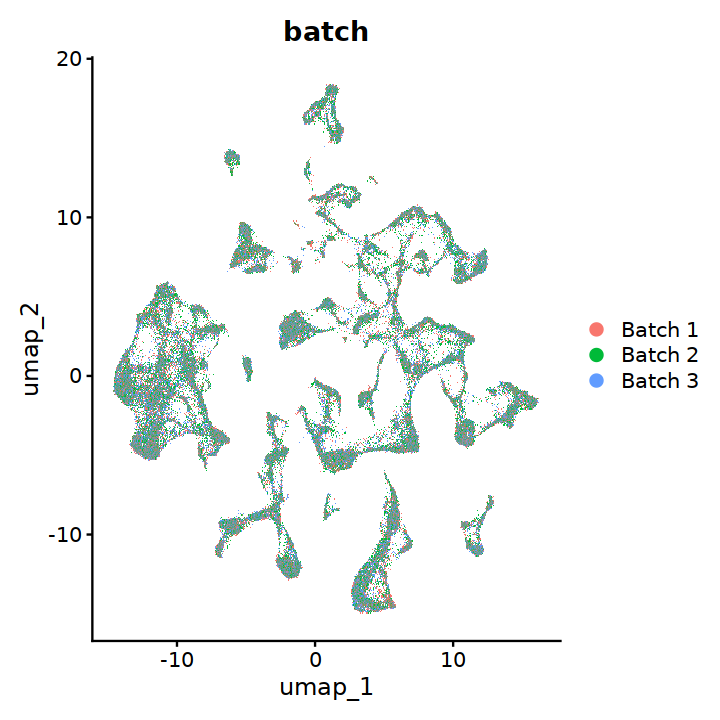

In [96]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



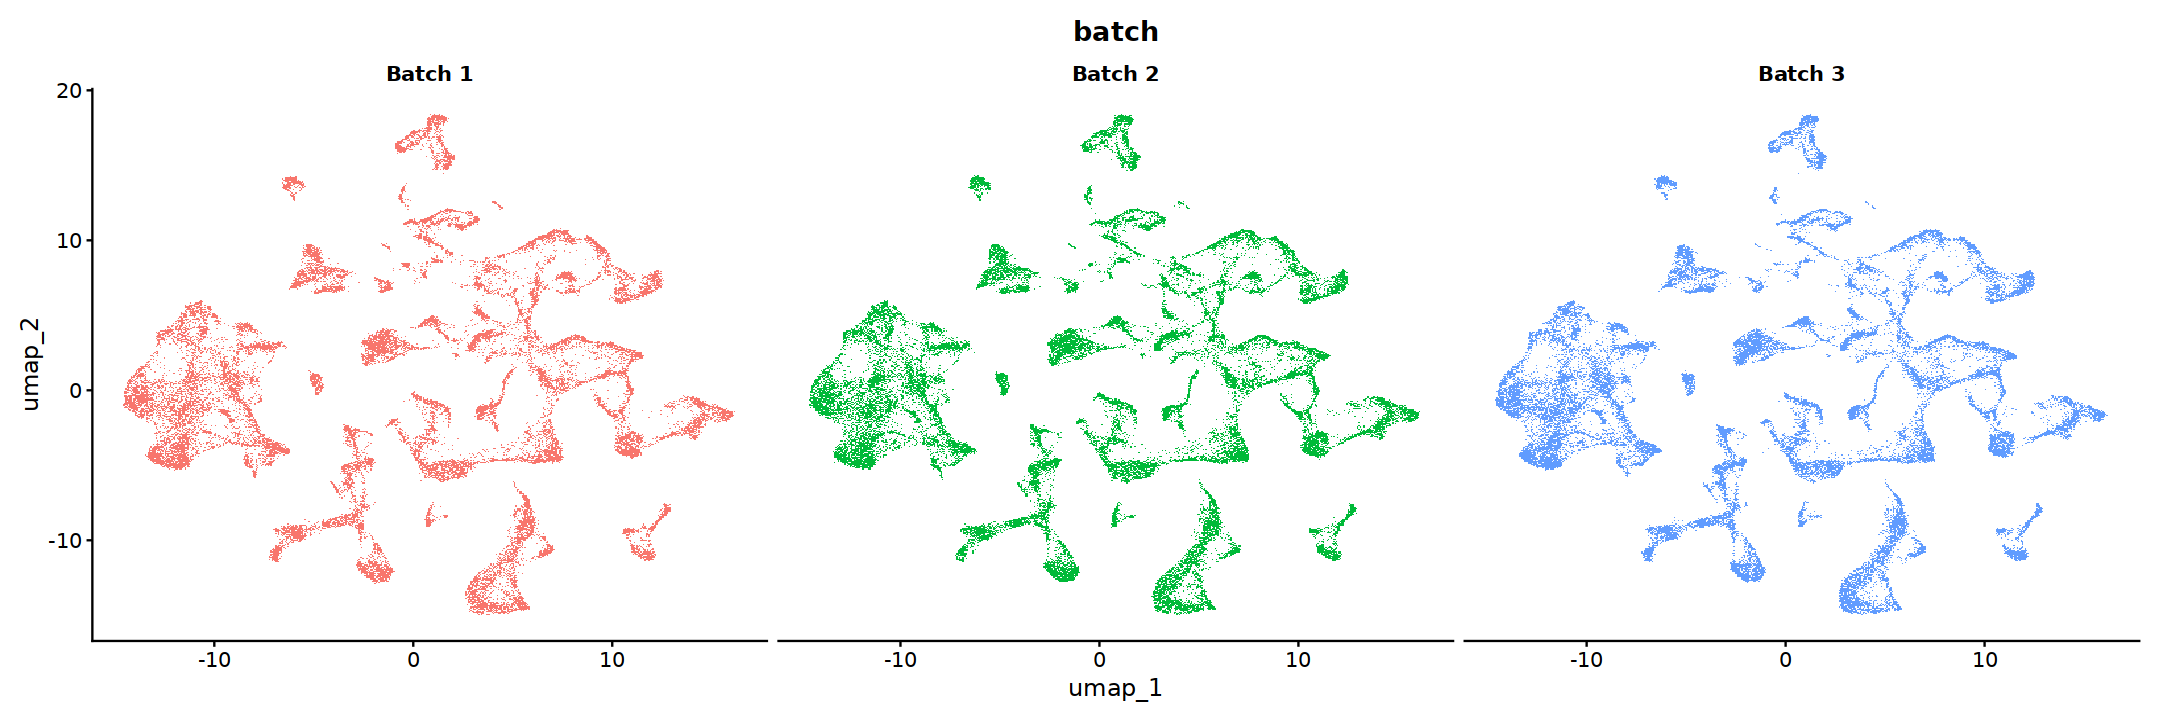

In [97]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



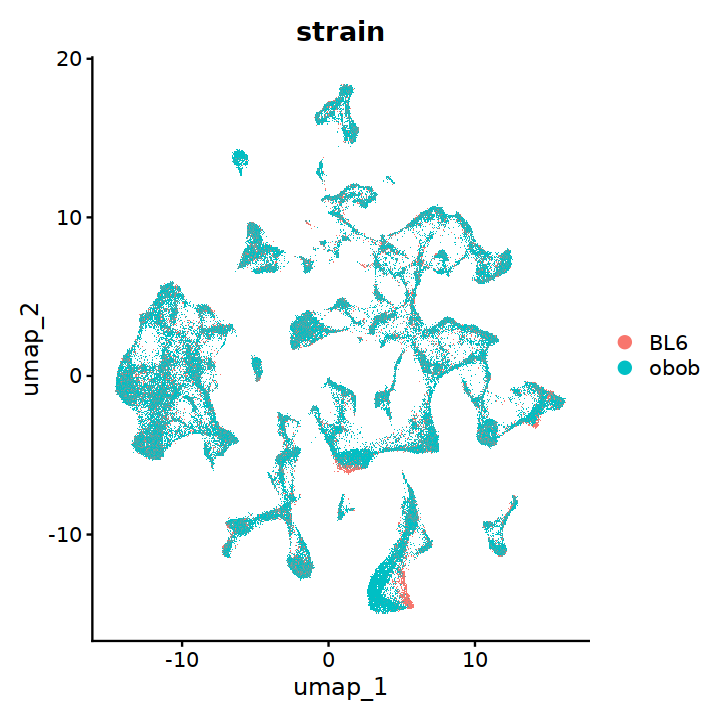

In [98]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



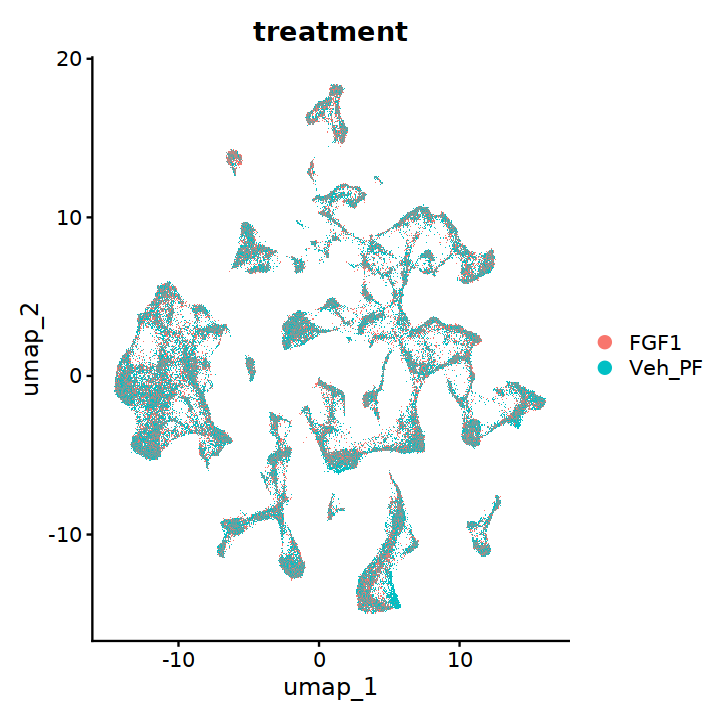

In [99]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



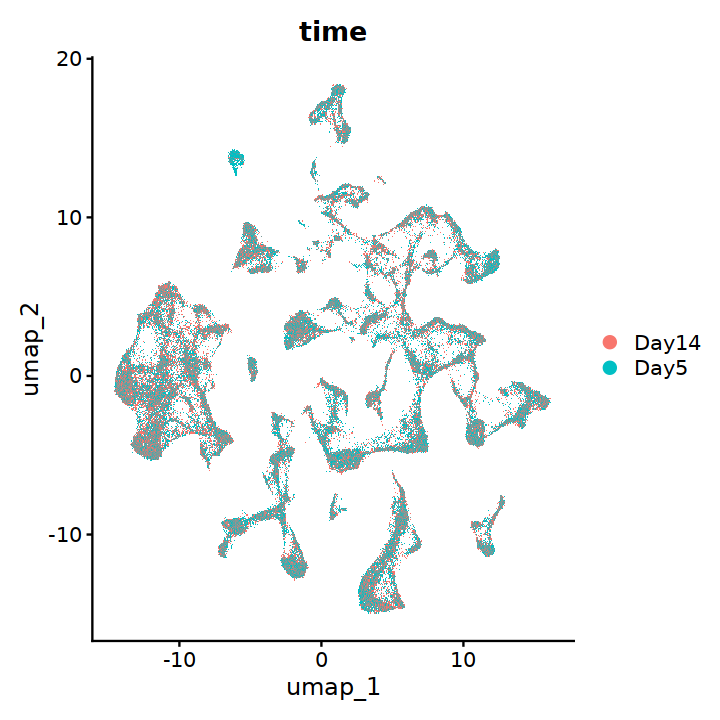

In [100]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



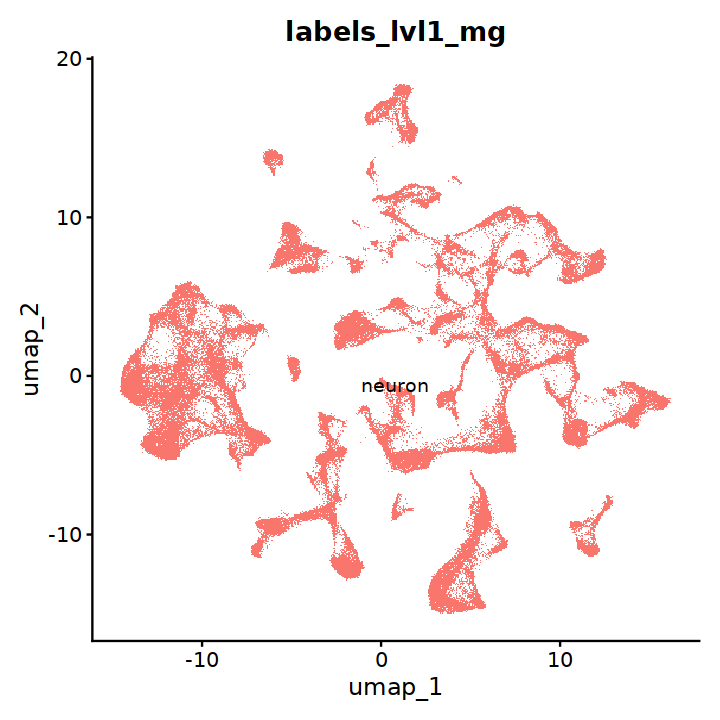

In [101]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1_mg', label=T) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



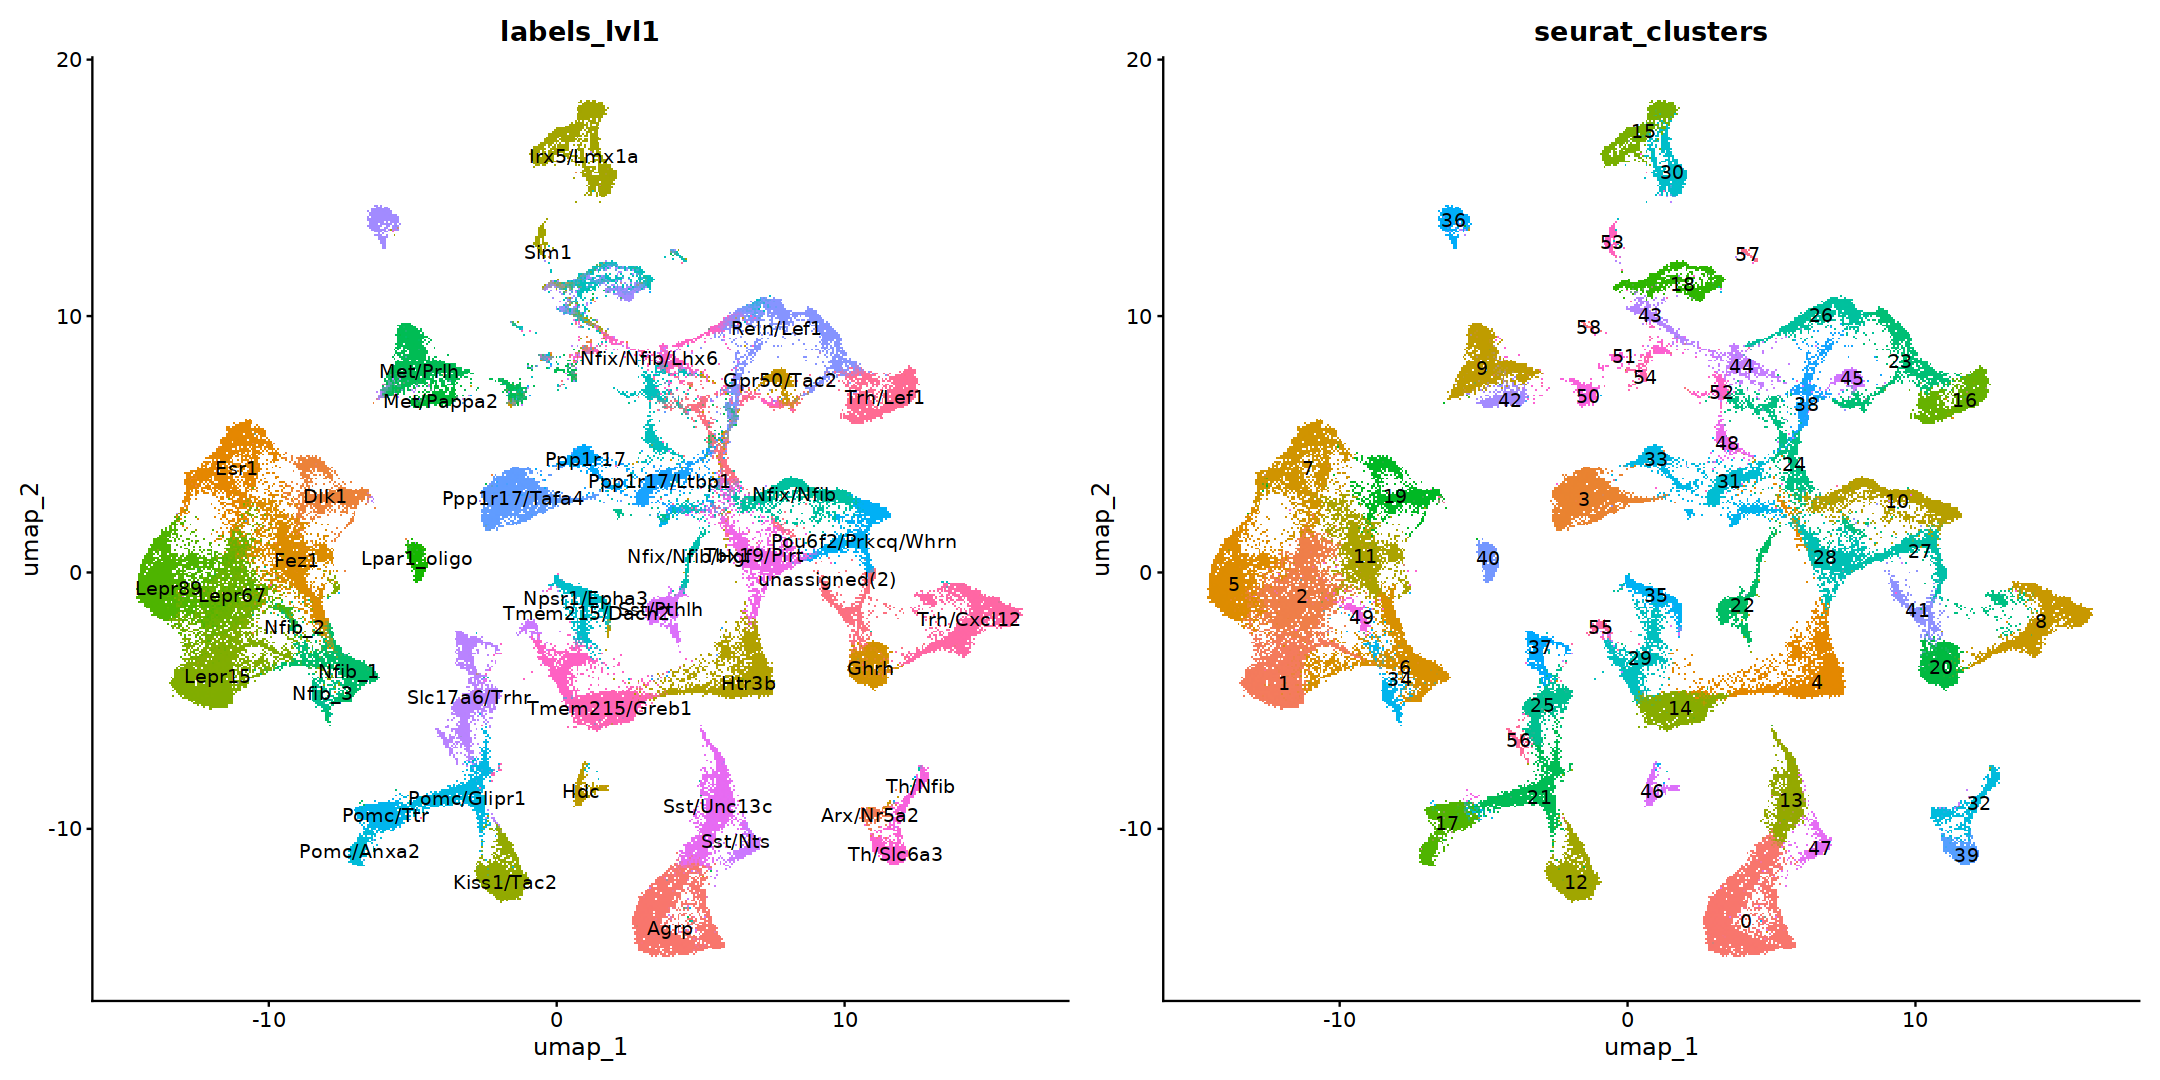

In [102]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



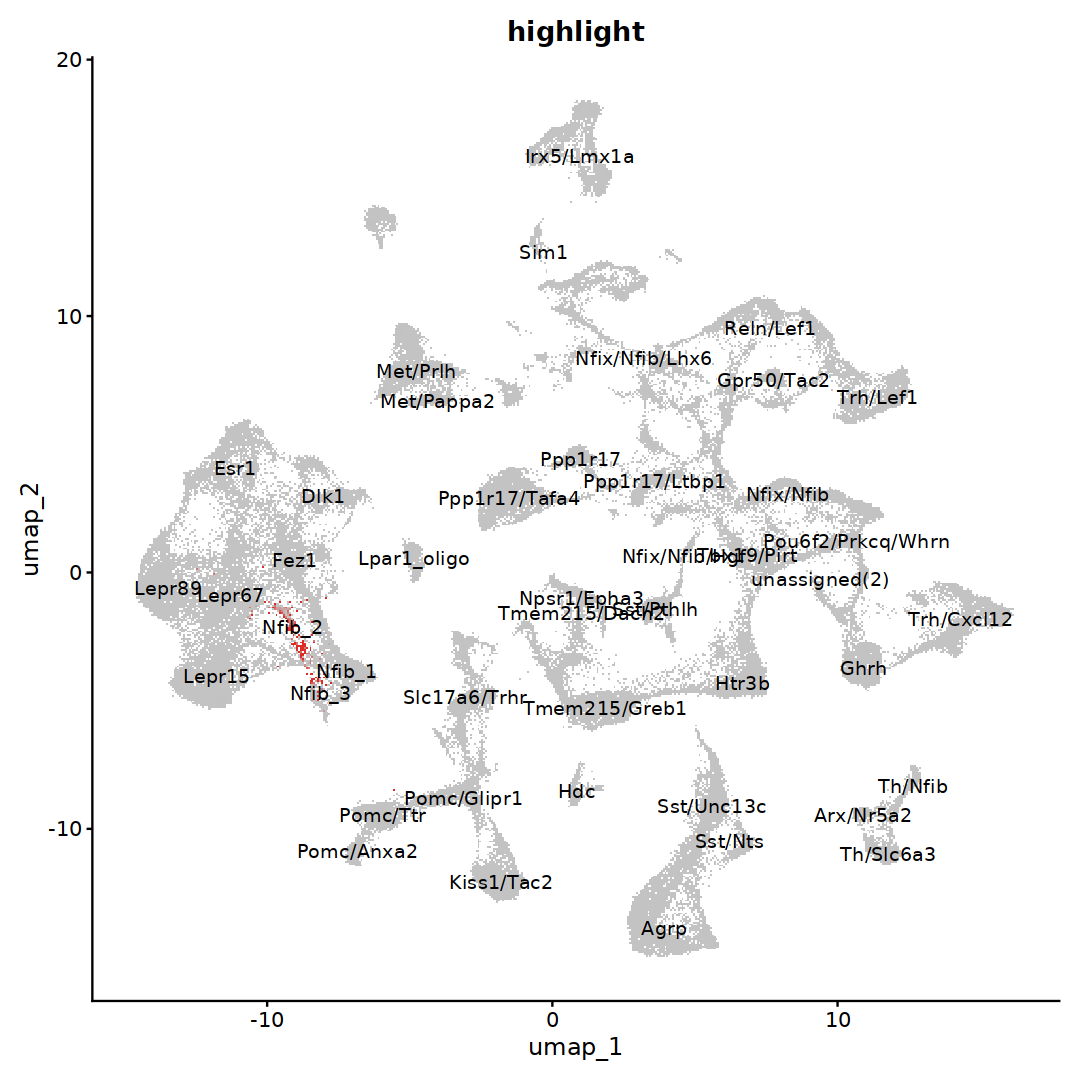

In [103]:
ch1 = obj %>% `[[` %>% filter(labels_lvl1 == 'Nfib_2') %>% rownames
options(repr.plot.width=9, repr.plot.height=9)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', cells.highlight = ch1, label=T) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



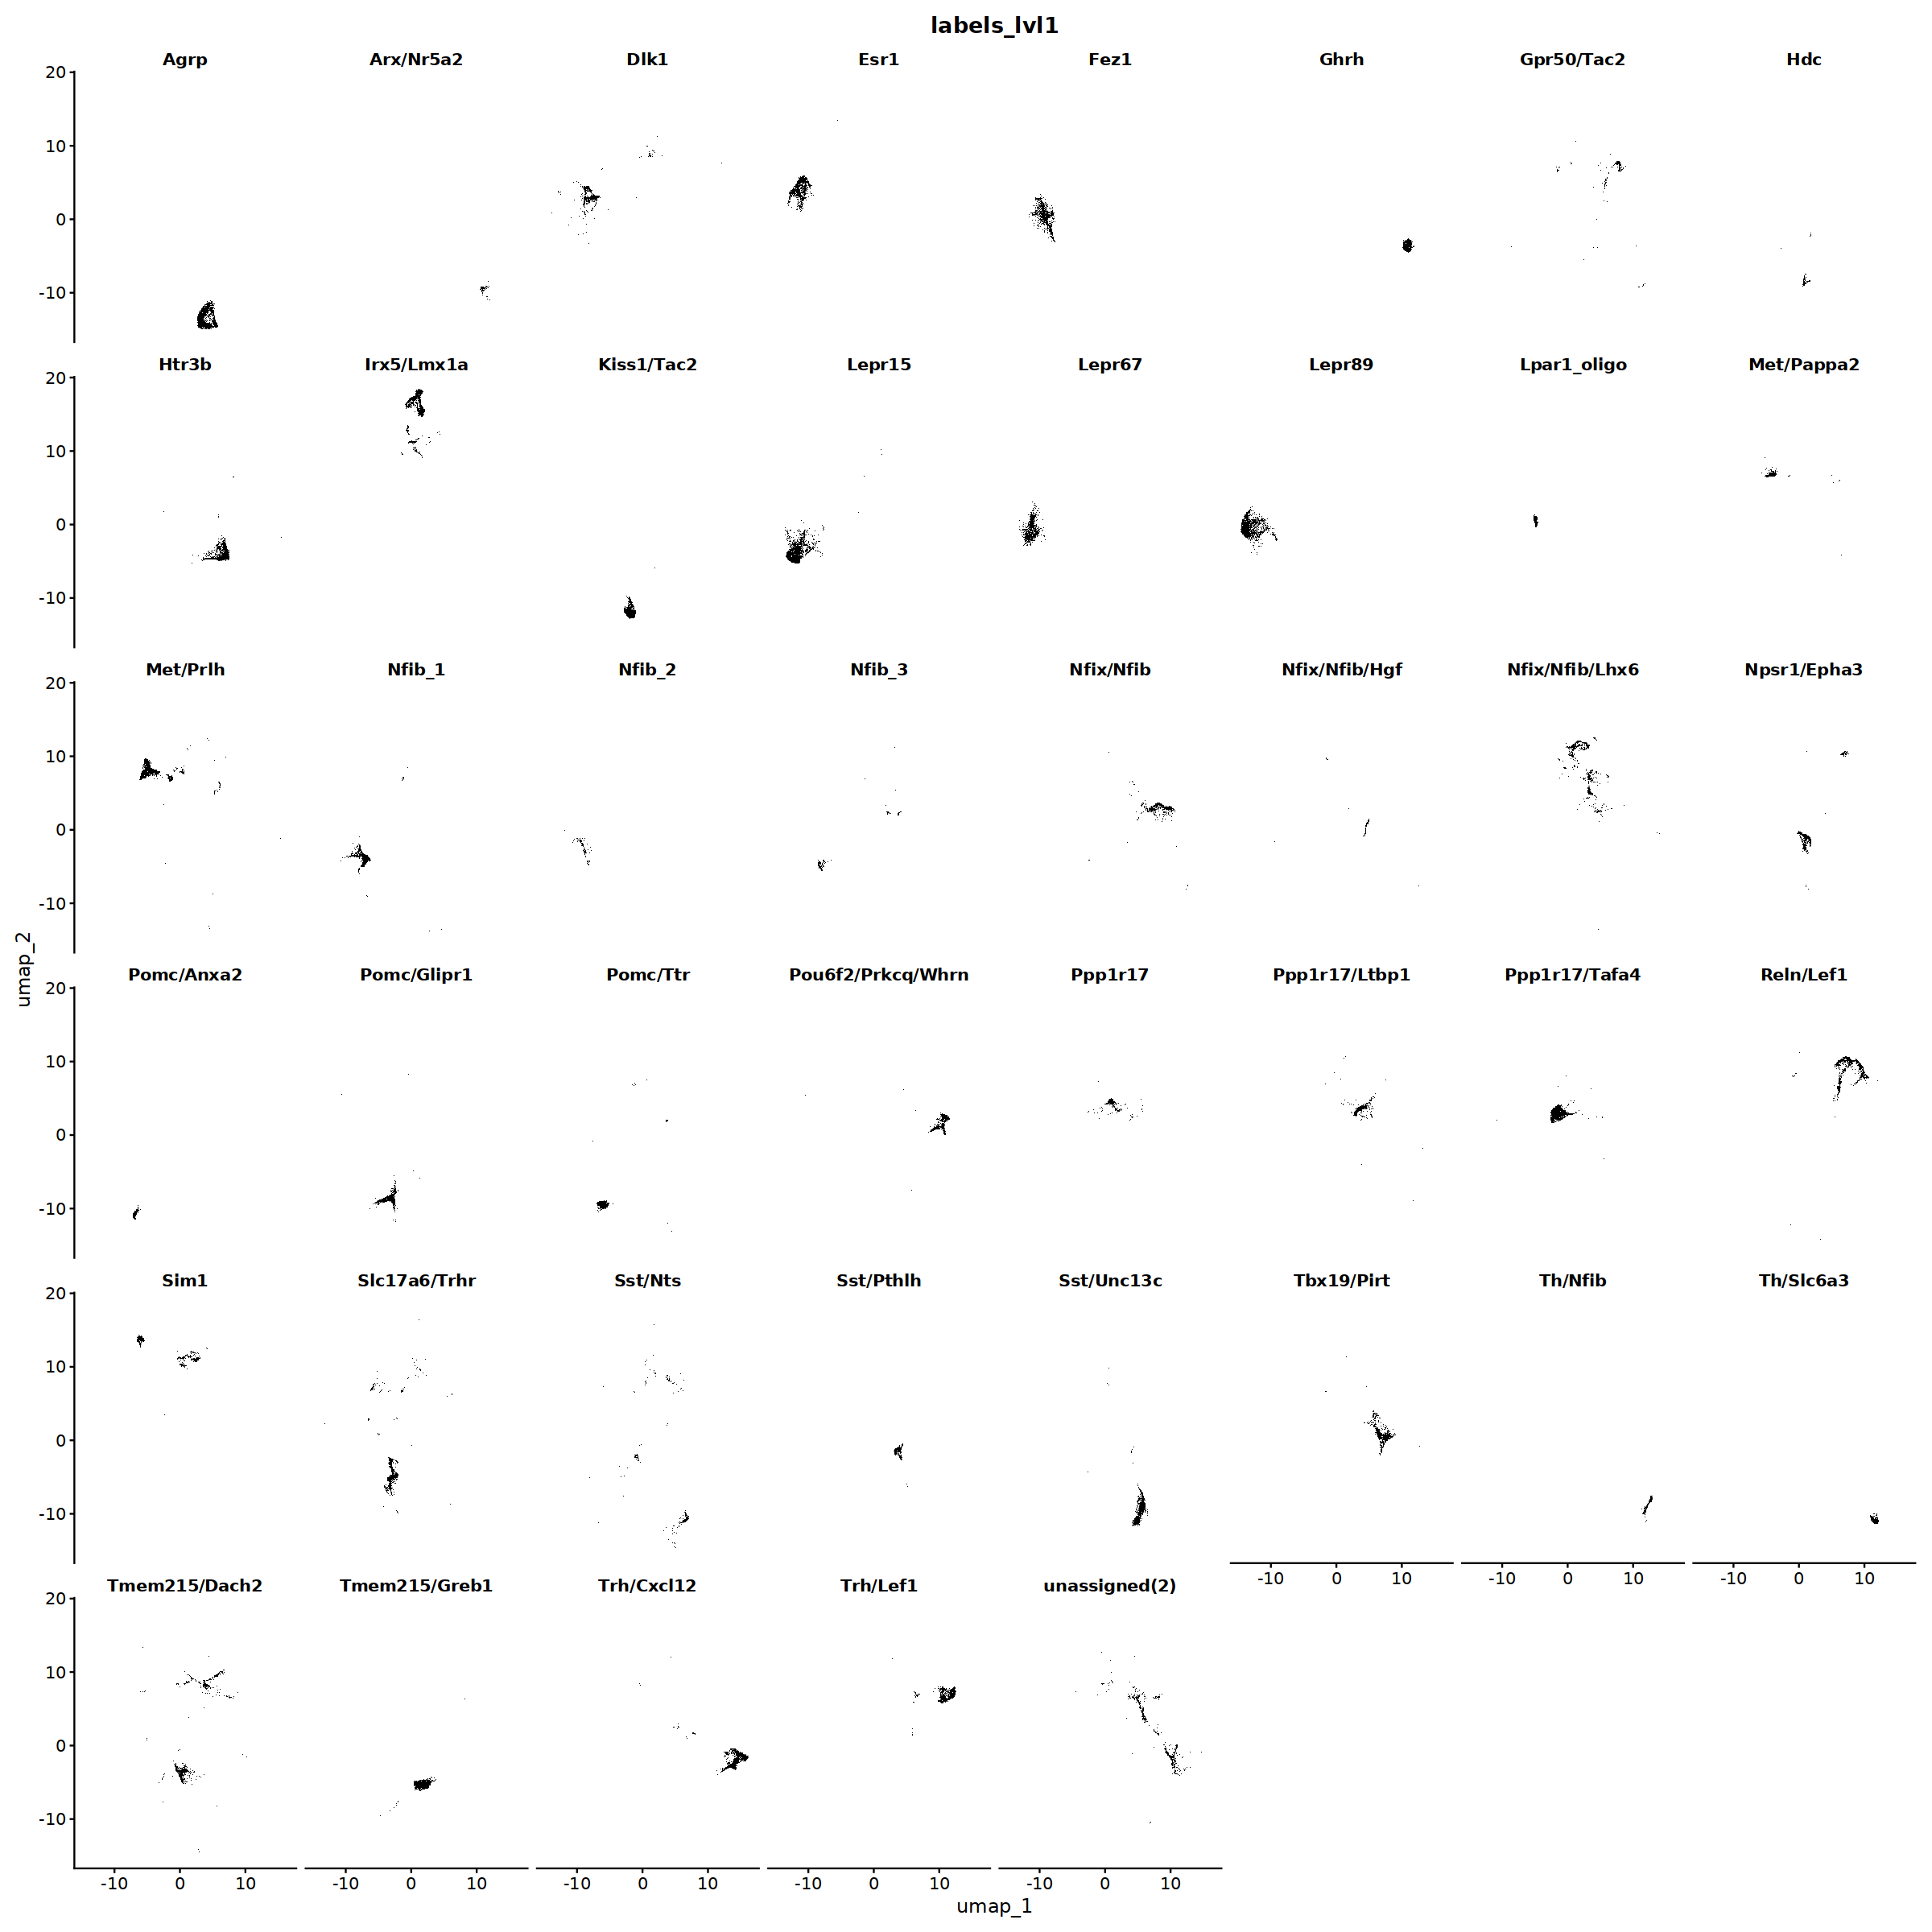

In [104]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=8) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



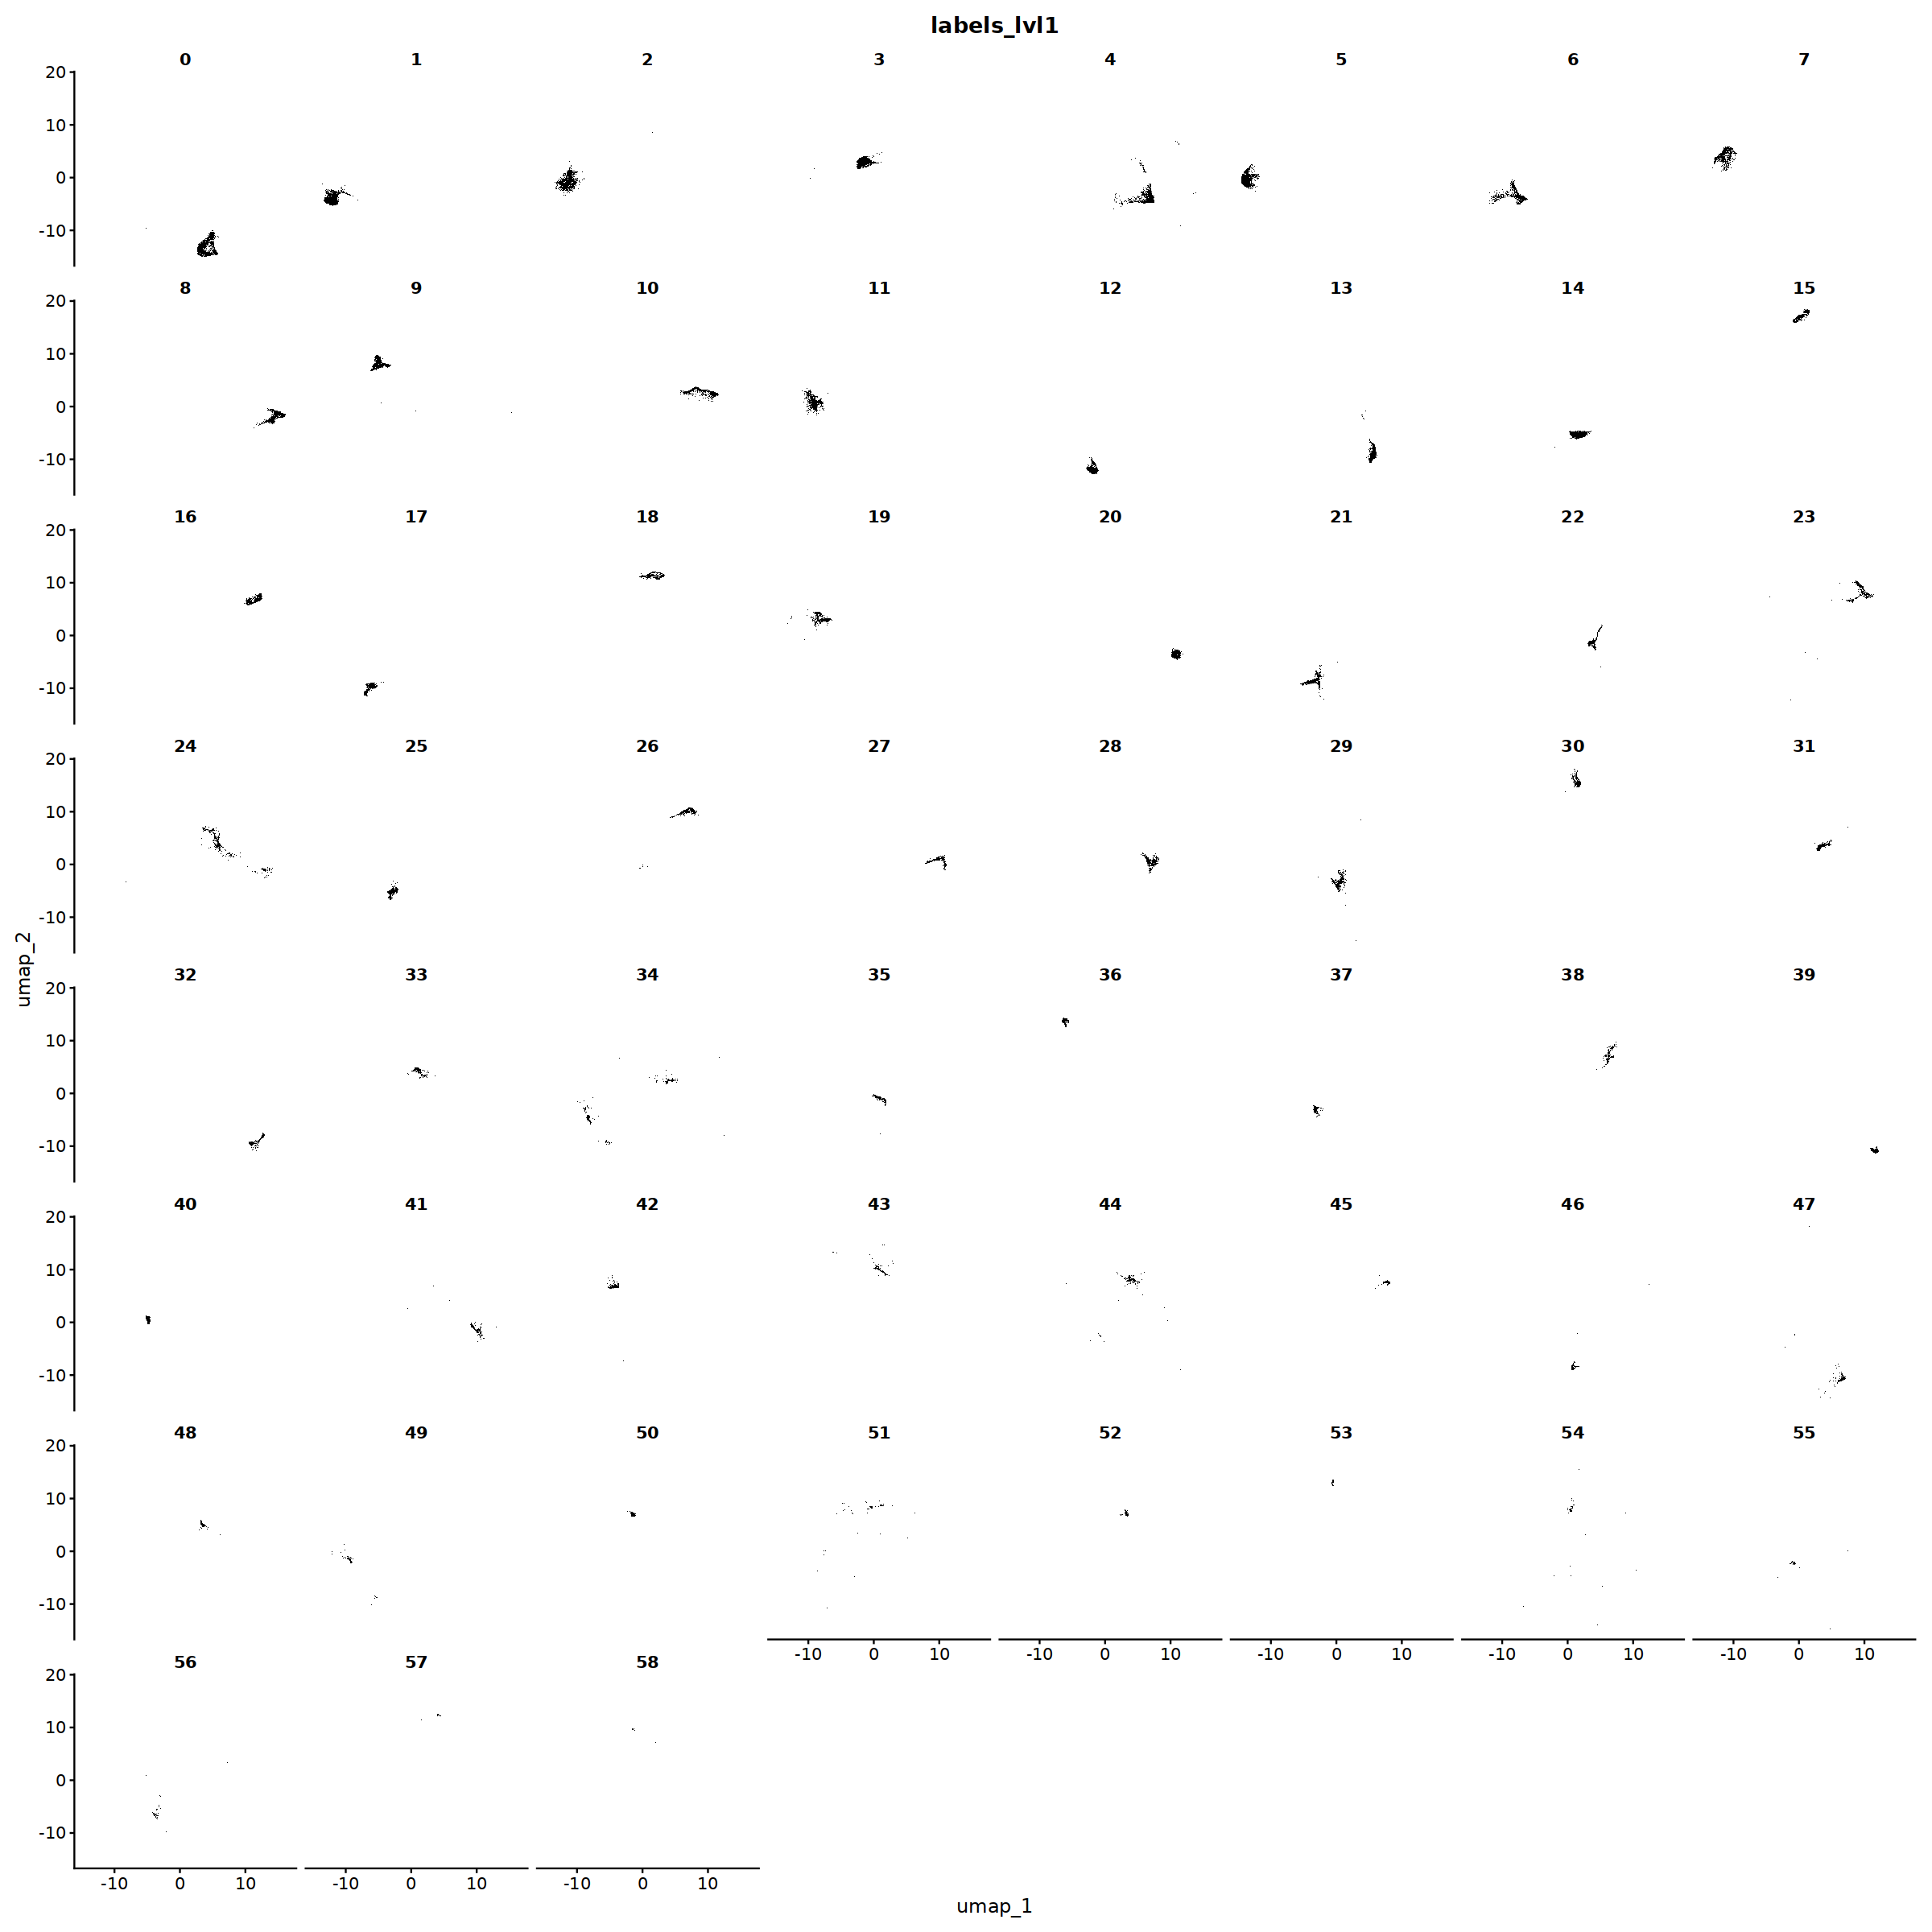

In [105]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

In [106]:
create_freq_df_per_cluster <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = labels, value = freq, fill = 0)
    freq_df

}

create_freq_df_per_label <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = seurat_clusters, value = freq, fill = 0)
    freq_df

}



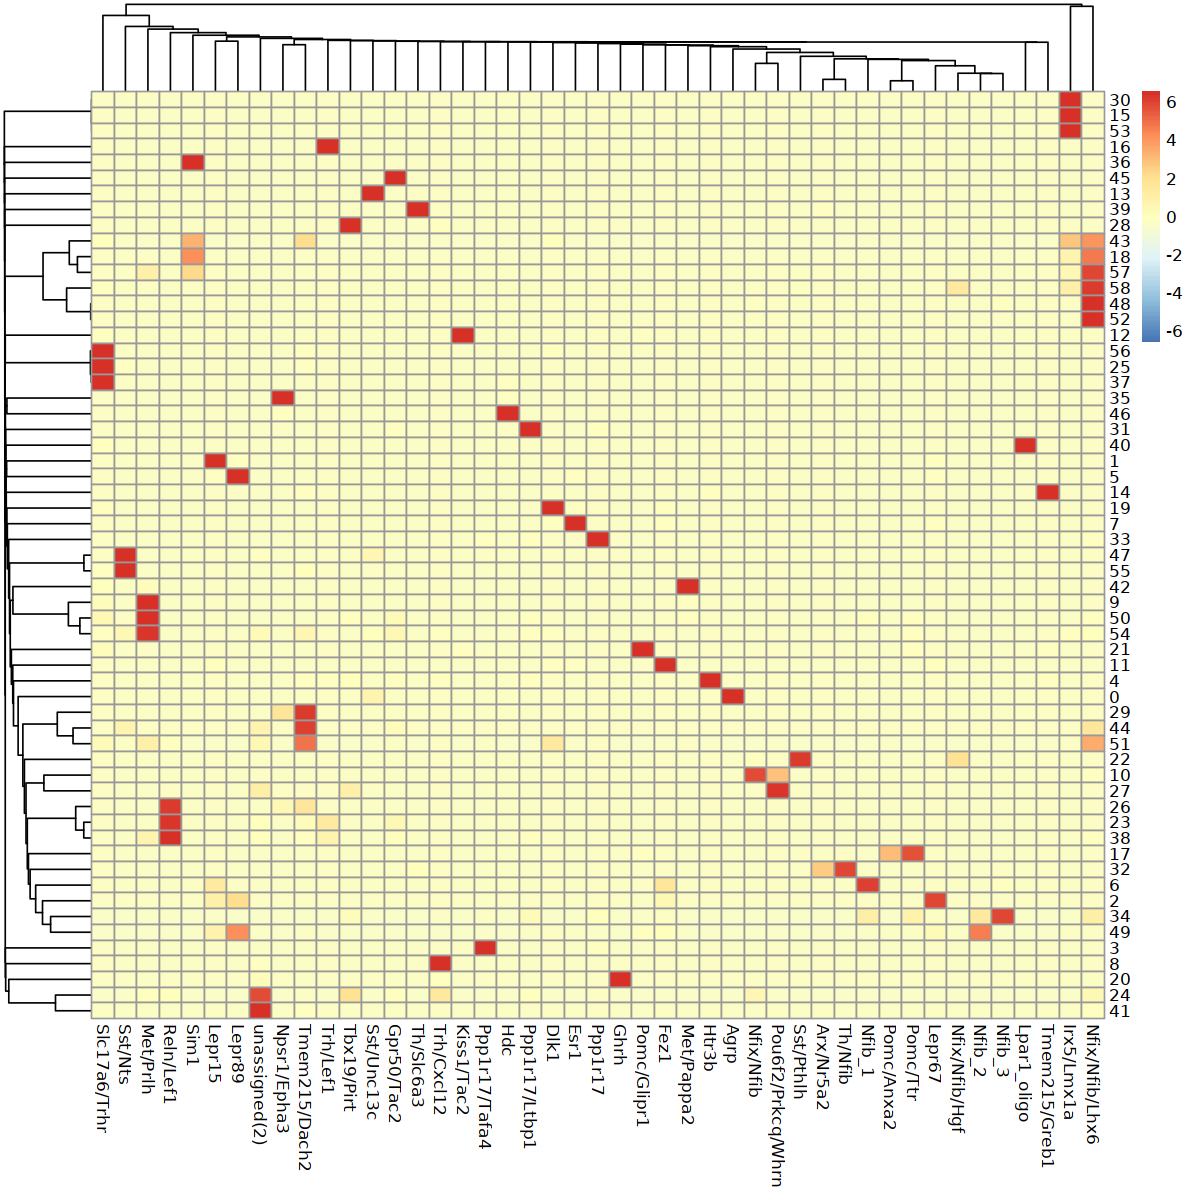

In [107]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


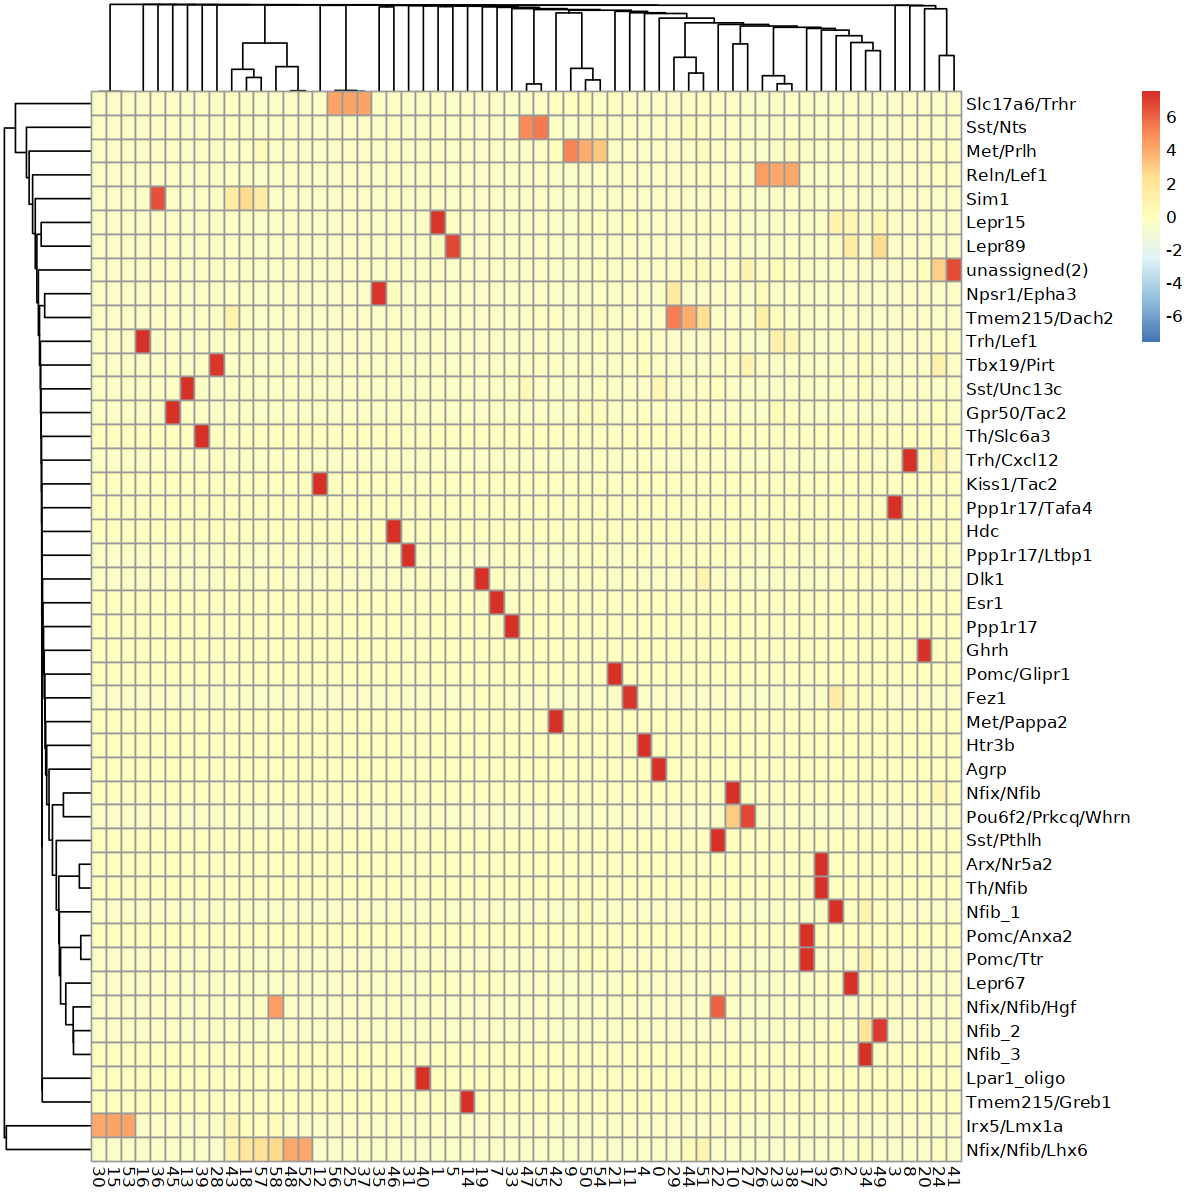

In [108]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_label(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


In [109]:
drop_these_cells = obj %>%
`[[` %>%
filter(!(seurat_clusters %in% c(51, 52, 53, 54, 55, 44, 20))) %>%
rownames


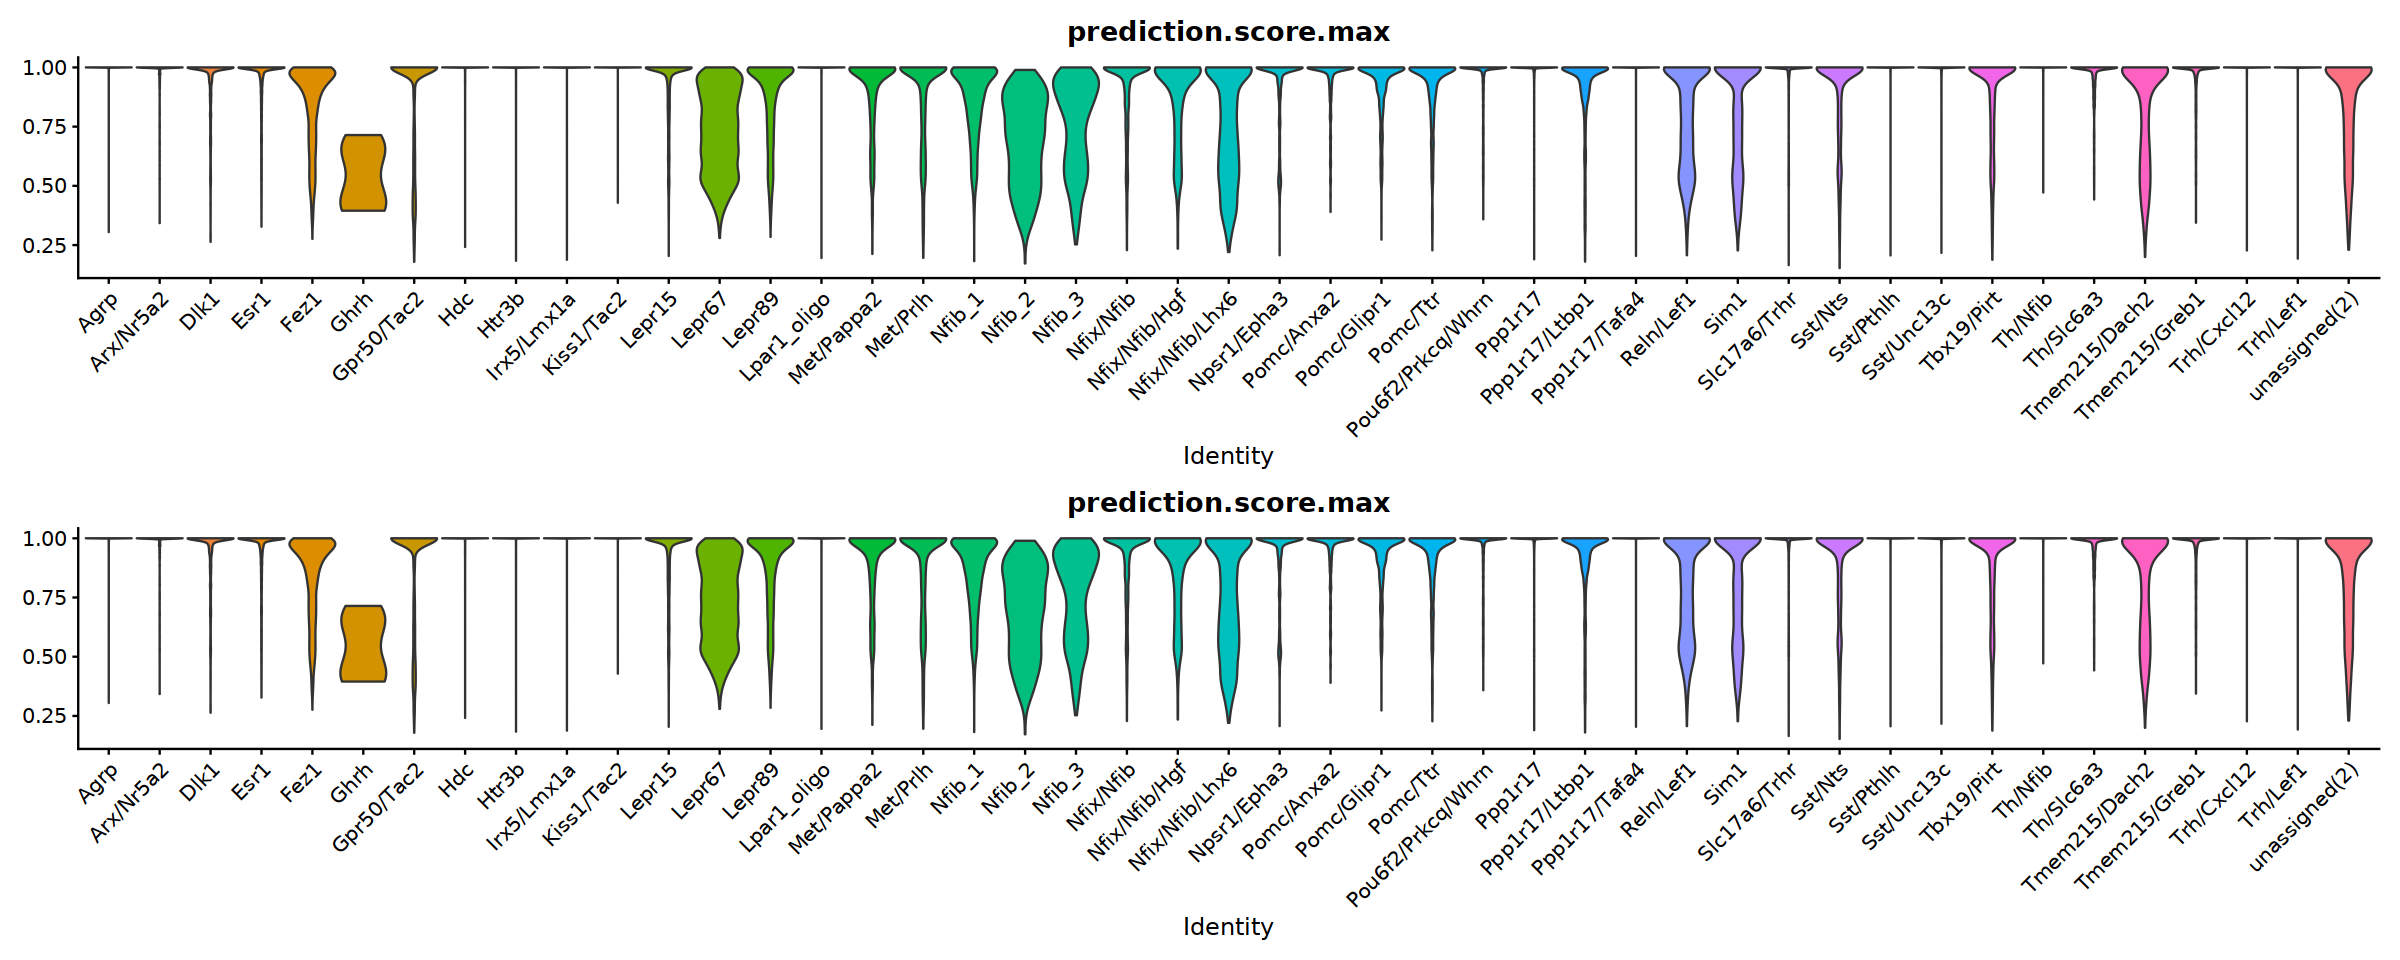

In [110]:
options(repr.plot.width=20, repr.plot.height=8)
p_vln1 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln2 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln1 / p_vln2

In [111]:
calculate_entropy <- function(set) {
  # Ensure 'input' is a vector
  if (!is.vector(set)) {
    stop("Input must be a vector.")
  }

  # Calculate frequencies/proportions of each item
  freq <- table(set) / length(set)

  # Compute entropy
  entropy <- -sum(freq * log(freq))

  # Normalize by the logarithm of the set size
  normalized_entropy <- entropy / log(length(set))

  return(normalized_entropy)
}


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



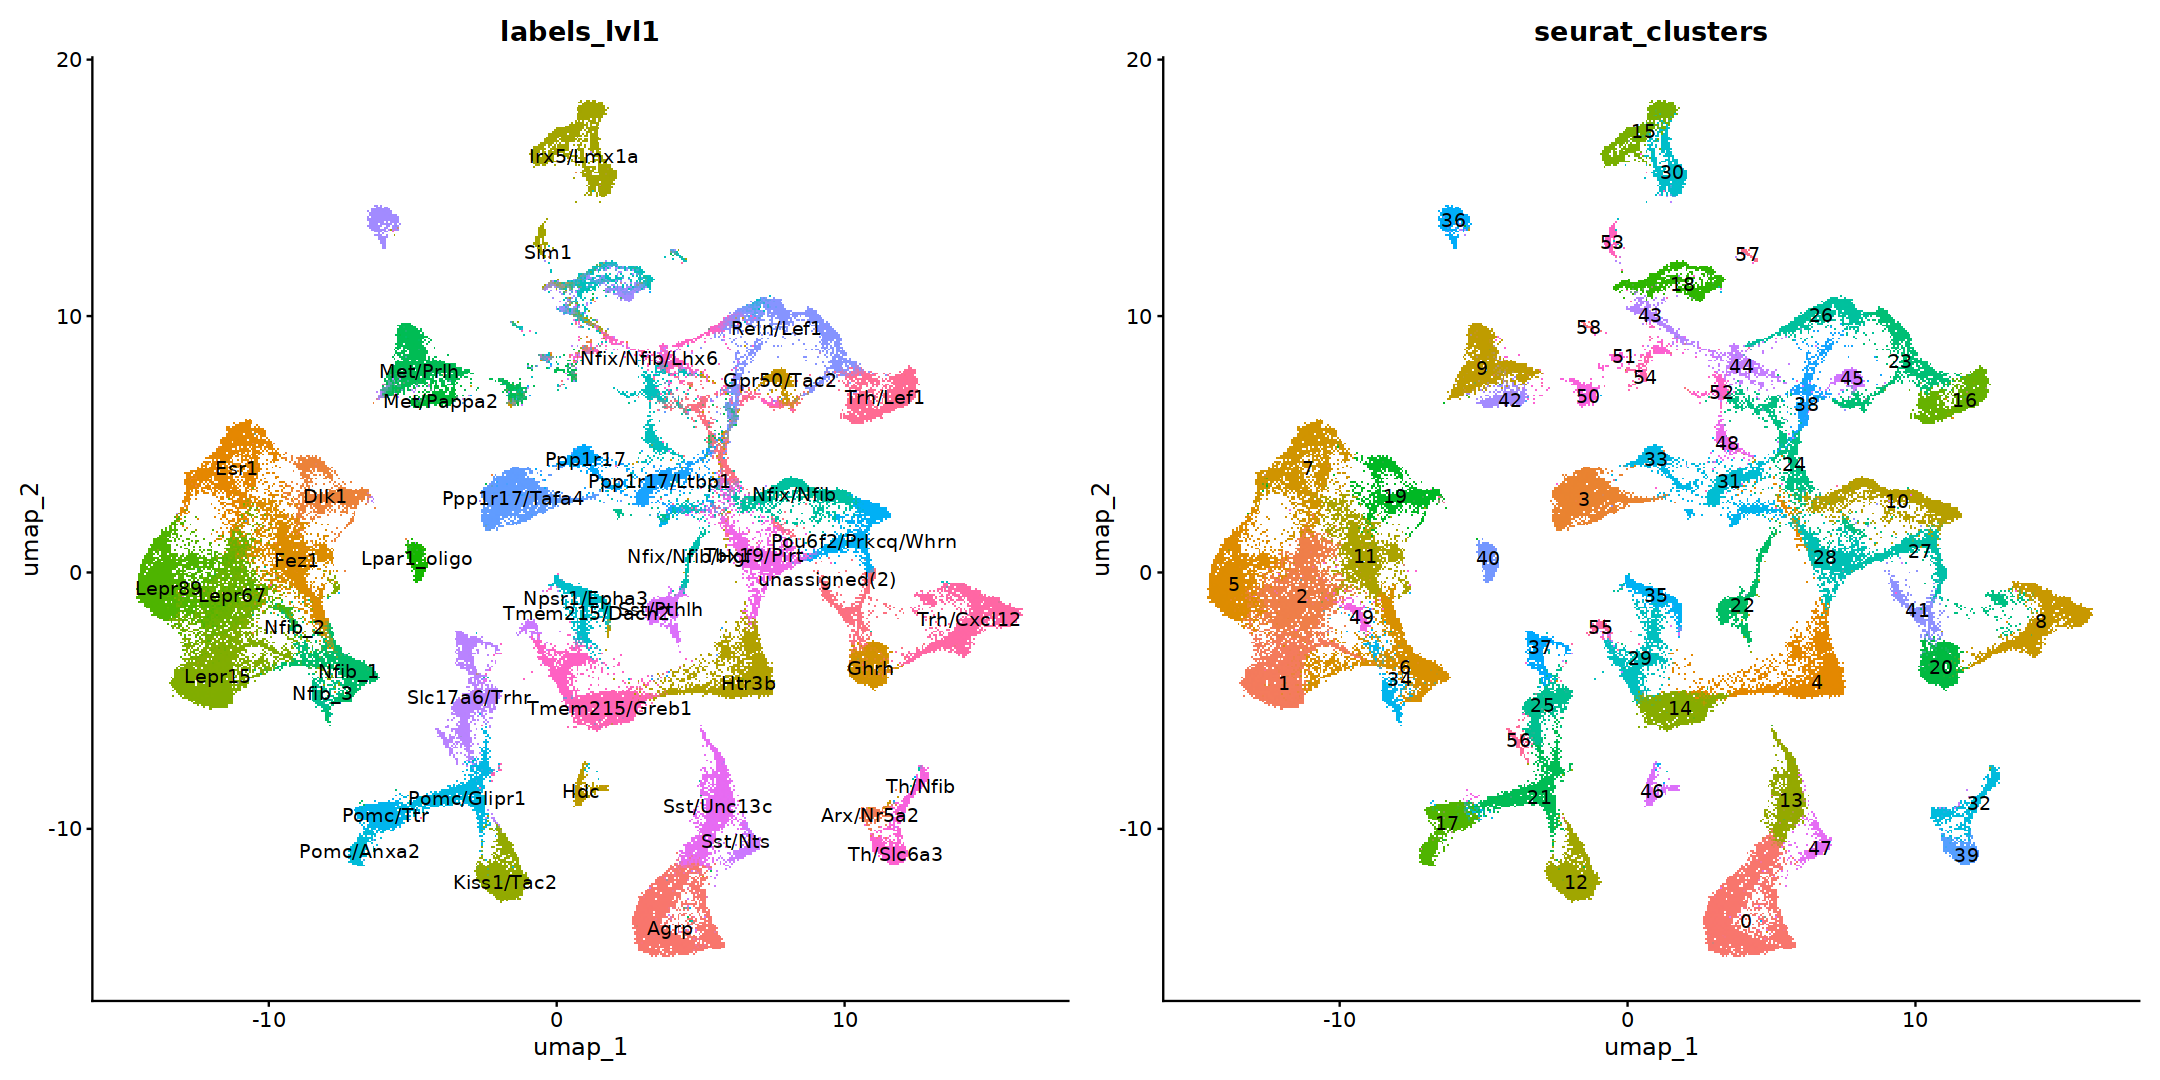

In [112]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [113]:
obj %>%
`[[` %>%
group_by(seurat_clusters) %>%
mutate(entropy = calculate_entropy(labels_lvl1)) %>%
select(seurat_clusters, entropy) %>%
distinct %>%
arrange(desc(entropy))

seurat_clusters entropy    
1  51              0.302941879
2  54              0.295197403
3  34              0.278105449
4  43              0.254013406
5  24              0.240055612
6  57              0.231455766
7  49              0.223827279
8  58              0.207919773
9  44              0.202460217
10 50              0.189077549
11 38              0.177138780
12 23              0.136198146
13 2               0.135984325
14 18              0.131315984
15 6               0.118193531
16 32              0.111524105
17 26              0.105407853
18 27              0.103734462
19 17              0.094195697
20 10              0.093725038
21 22              0.083903570
22 29              0.083369824
23 47              0.073686455
24 4               0.064444715
25 11              0.056926287
26 42              0.048736325
27 55              0.046786720
28 0               0.045505650
29 21              0.042236967
30 9               0.035907361
31 33              0.034370798
32 20              0.026771191
33 56              0.019830164
34 48              0.018900629
35 7               0.018312332
36 19              0.017659935
37 35              0.017428791
38 14              0.016482308
39 40              0.015846503
40 5               0.015373717
41 1               0.012946071
42 31              0.011720750
43 46              0.011201471
44 25              0.011082731
45 41              0.010740225
46 8               0.010225510
47 3               0.008082647
48 12              0.007839278
49 52              0.007093007
50 37              0.006714102
51 28              0.004242696
52 39              0.004129781
53 13              0.003412288
54 45              0.002952508
55 30              0.002198703
56 36              0.001058429
57 16              0.001010378
58 15              0.000000000
59 53              0.000000000

In [114]:
labels_chunk_v01 = obj %>%
`[[` %>%
mutate(labels_chunk = case_when(seurat_clusters %in% c(0, 13, 47) ~ 'n1',
                                seurat_clusters %in% c(12, 21, 17, 56, 25, 37) ~ 'n2',
                                seurat_clusters %in% c(46) ~ 'n3',
                                seurat_clusters %in% c(7, 19, 5, 2, 11, 49, 1, 6) ~ 'n4',
                                seurat_clusters == 34 & str_detect(labels_lvl1, "^Nfib") ~ 'n4',
                                seurat_clusters == 34 & !str_detect(labels_lvl1, "^Nfib") ~ 'n0',
                                seurat_clusters %in% c(40) ~ 'n5',
                                seurat_clusters %in% c(53, 18, 43, 51, 54, 57, 50) ~ 'n_drop',
                                seurat_clusters %in% c(9, 42) ~ 'n6',
                                seurat_clusters %in% c(36) ~ 'n8',
                                seurat_clusters %in% c(15, 30) ~ 'n9',
                                seurat_clusters %in% c(32, 39) ~ 'n10',
                                TRUE ~ 'n0')) %>%
select(labels_chunk)

labels_chunk_v01 %>% qs::qsave('labels_chunk_neuron_v01.qs')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



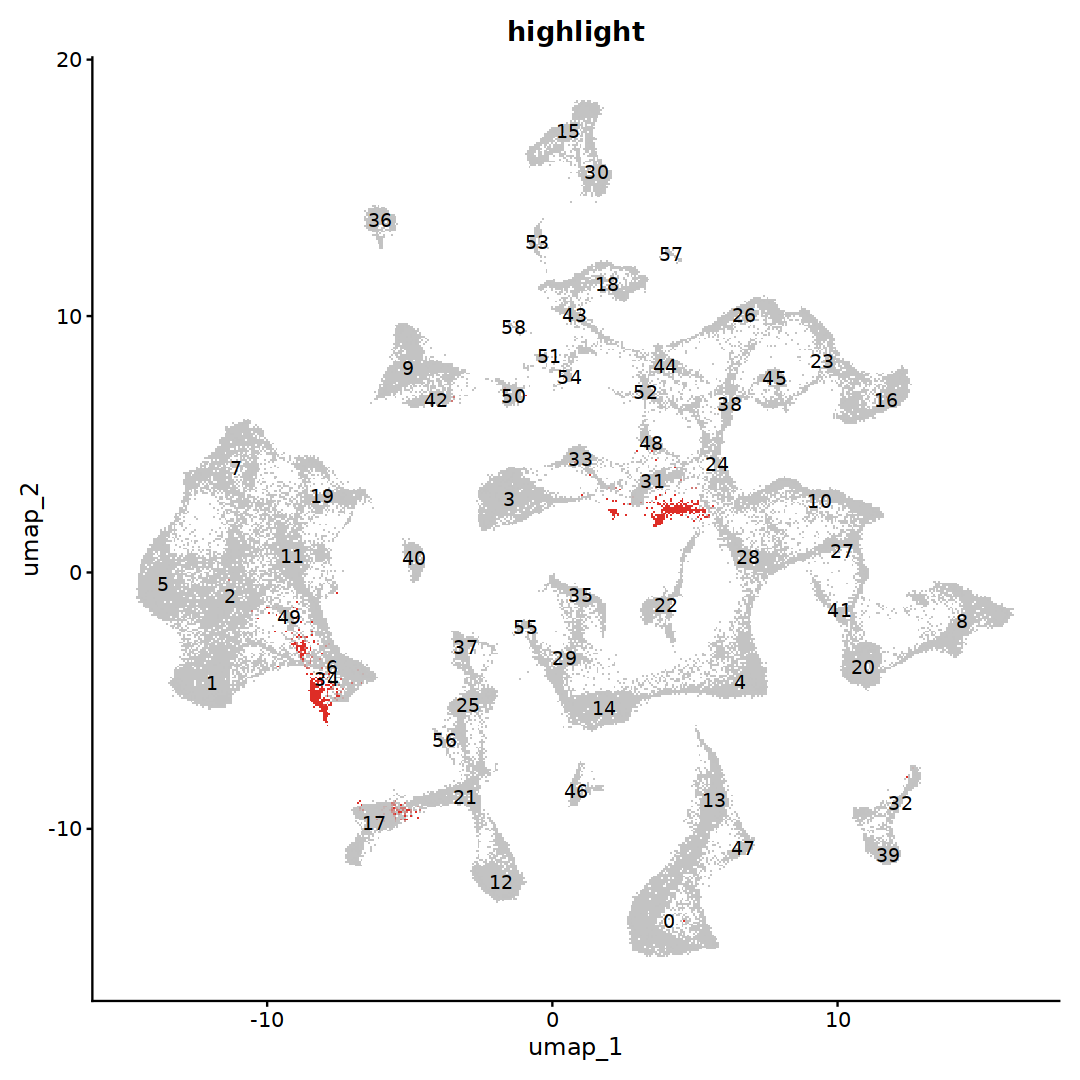

In [115]:
ch1 = obj %>% `[[` %>% filter(seurat_clusters == 34) %>% rownames
options(repr.plot.width=9, repr.plot.height=9)
DimPlot(obj, reduction = "umap", group.by='seurat_clusters', cells.highlight = ch1, label=T) + NoLegend()

In [116]:
obj = obj %>% AddMetaData(labels_chunk_v01)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



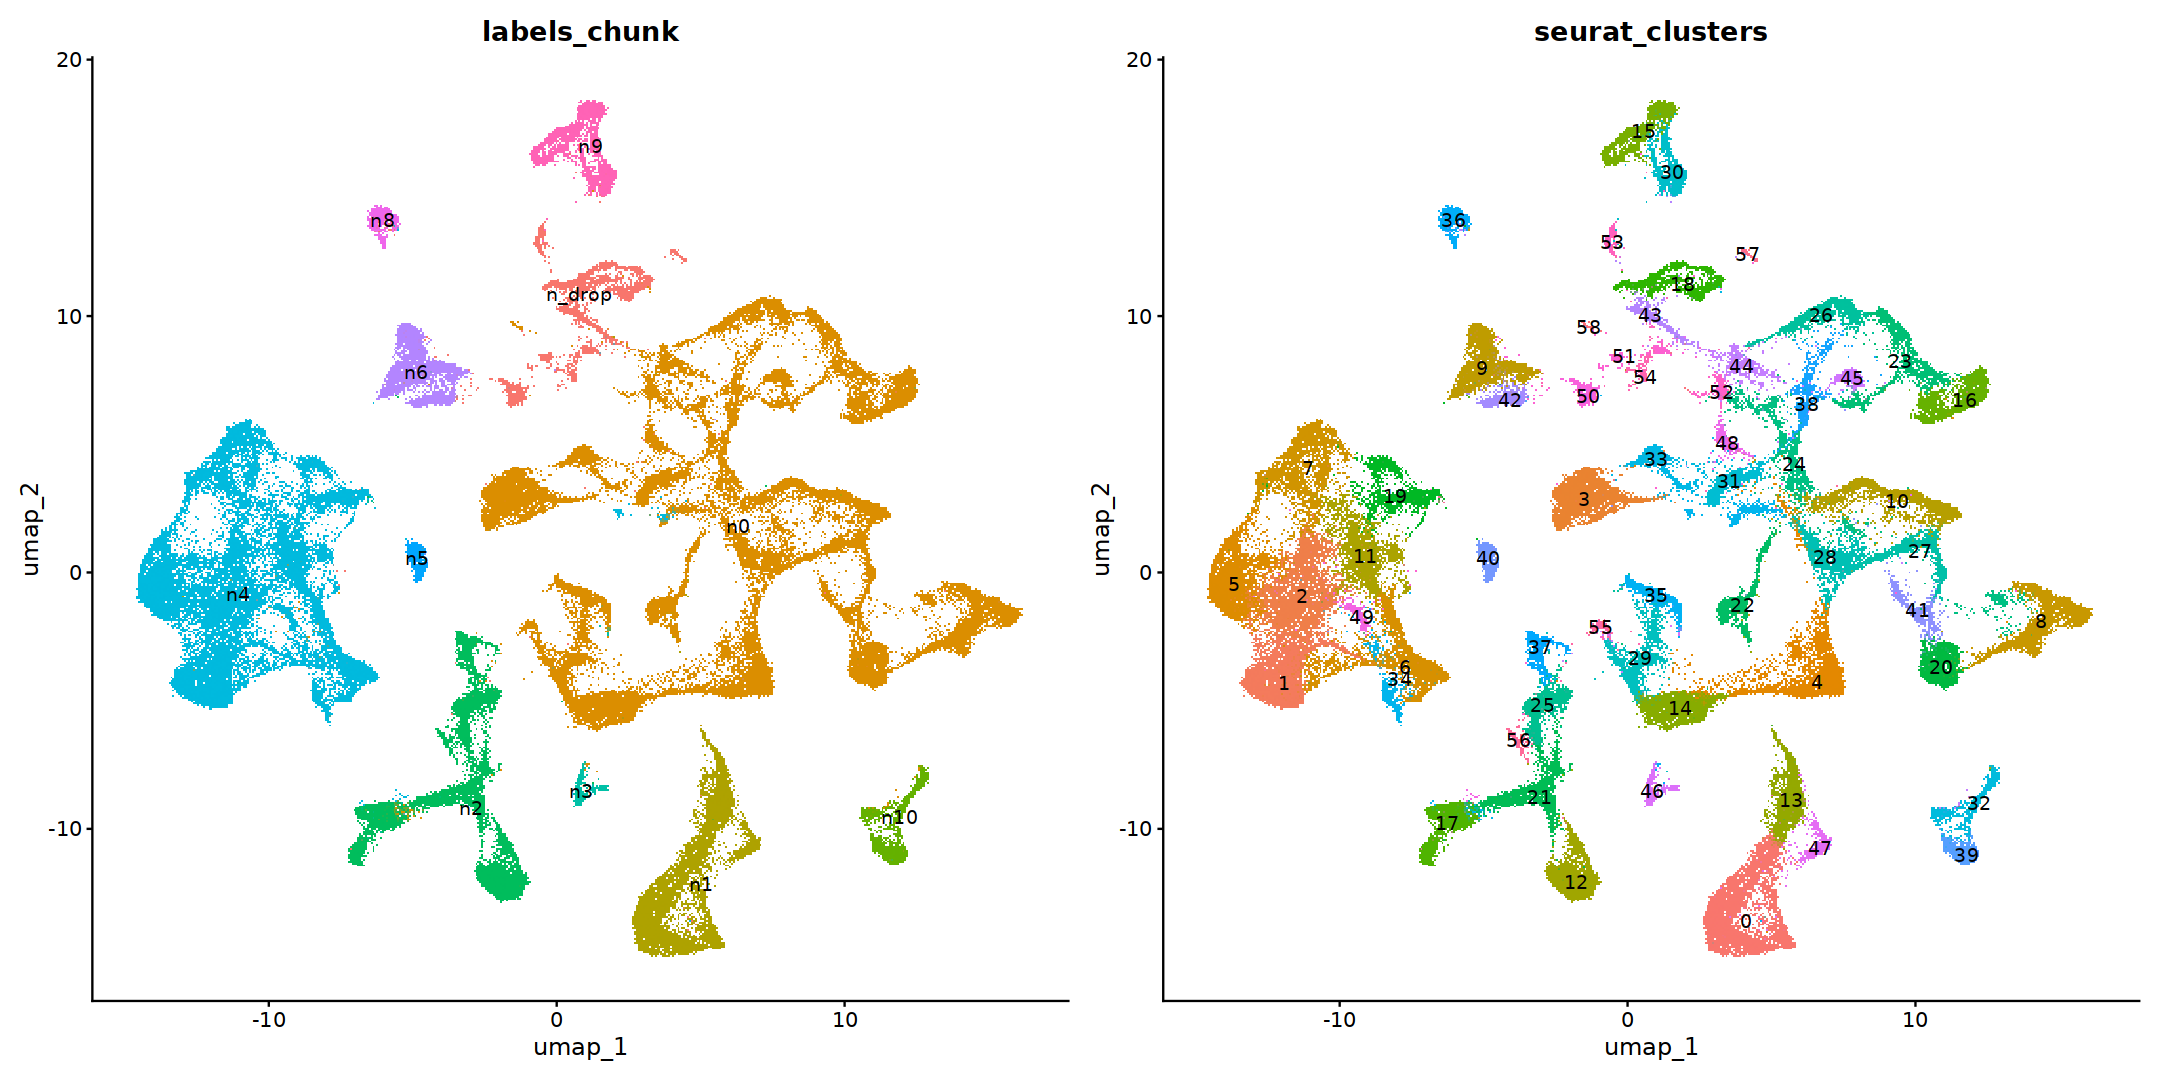

In [117]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



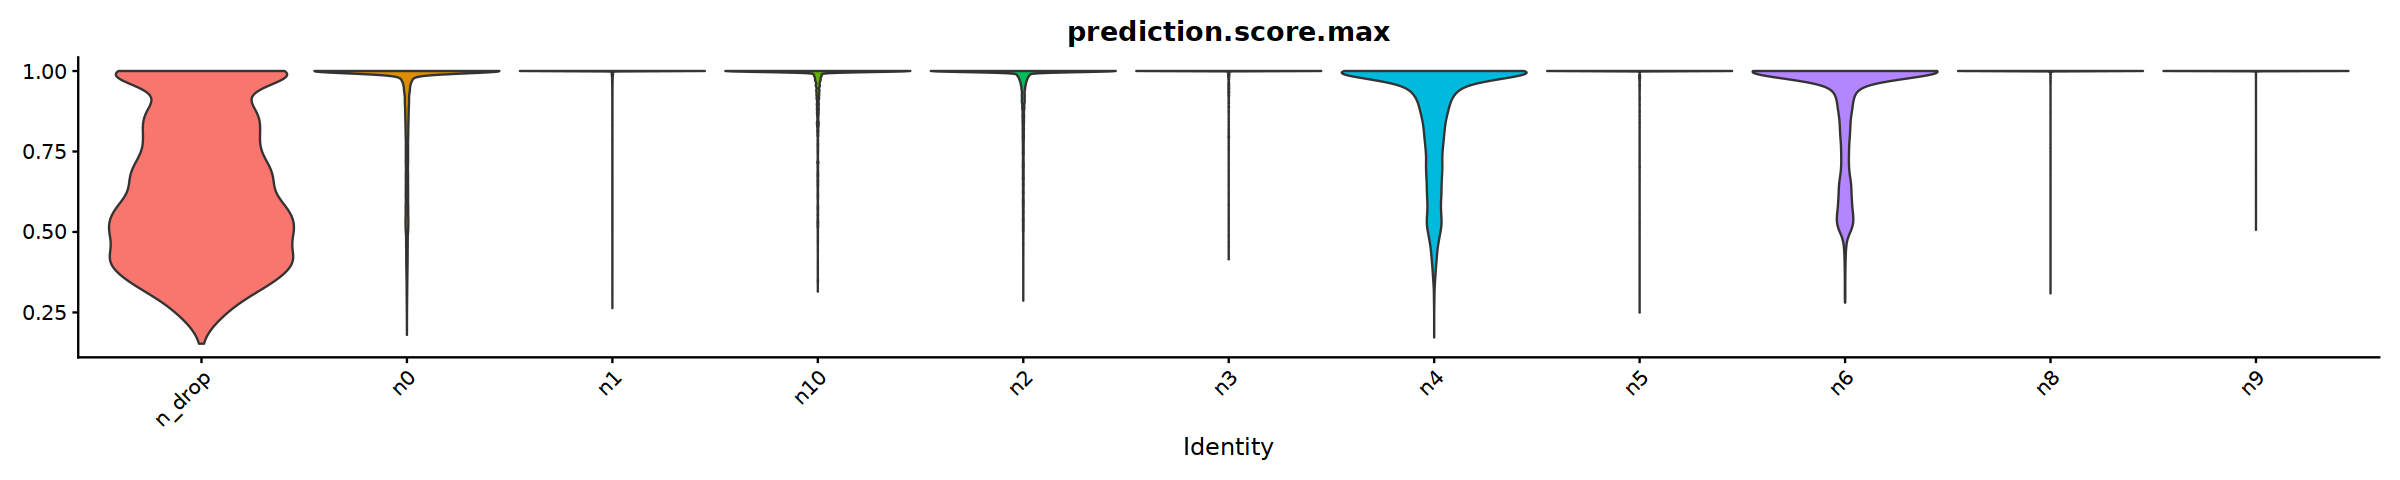

In [118]:
options(repr.plot.width=20, repr.plot.height=4)
p_vln_drop = obj %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_chunk',
           pt.size=0) + NoLegend()

p_vln_drop

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



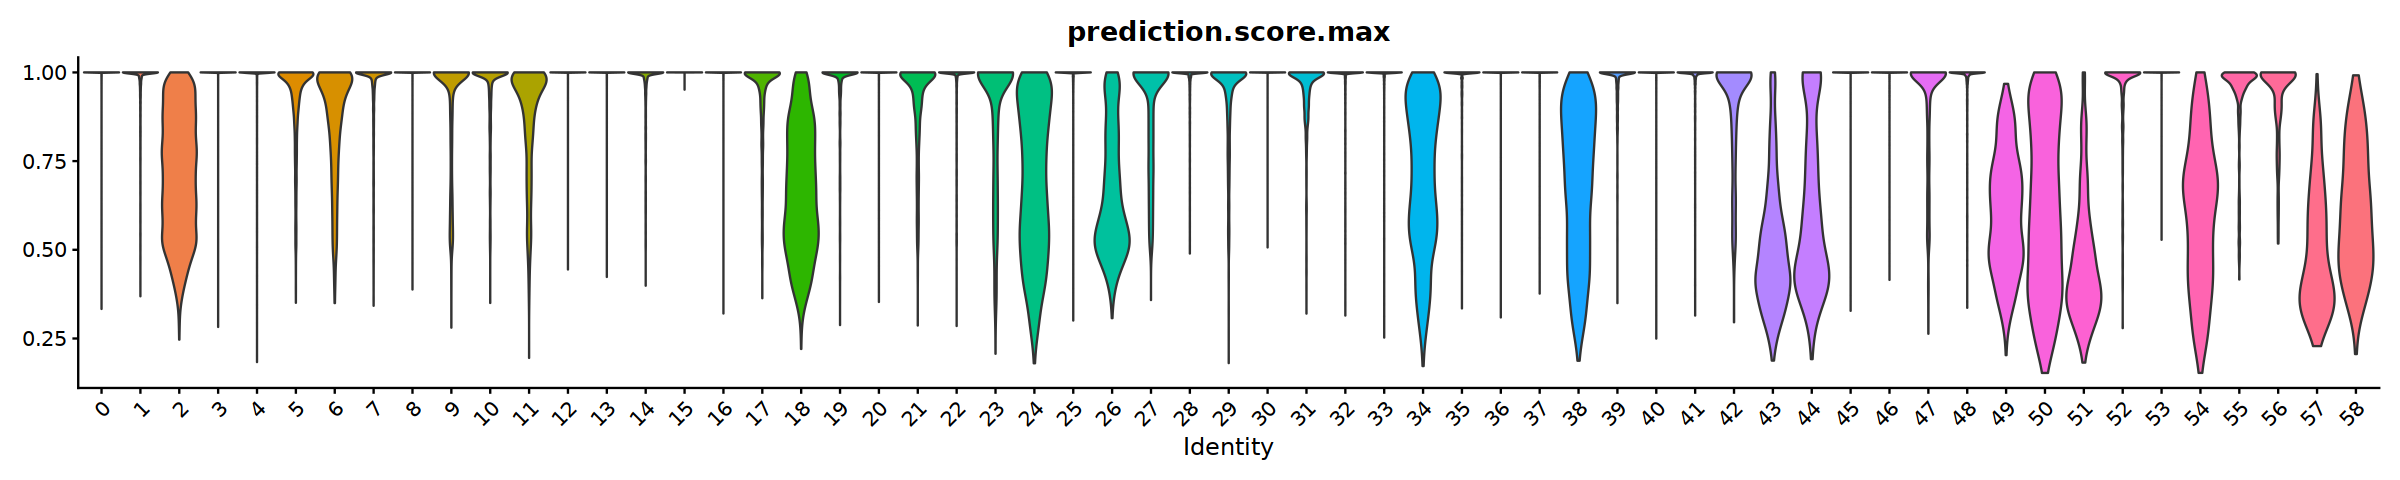

In [119]:
options(repr.plot.width=20, repr.plot.height=4)
p_vln_clust = obj %>%
    VlnPlot(features = "prediction.score.max", group.by = 'seurat_clusters',
           pt.size=0) + NoLegend()

p_vln_clust

In [120]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"                        "labels_chunk"

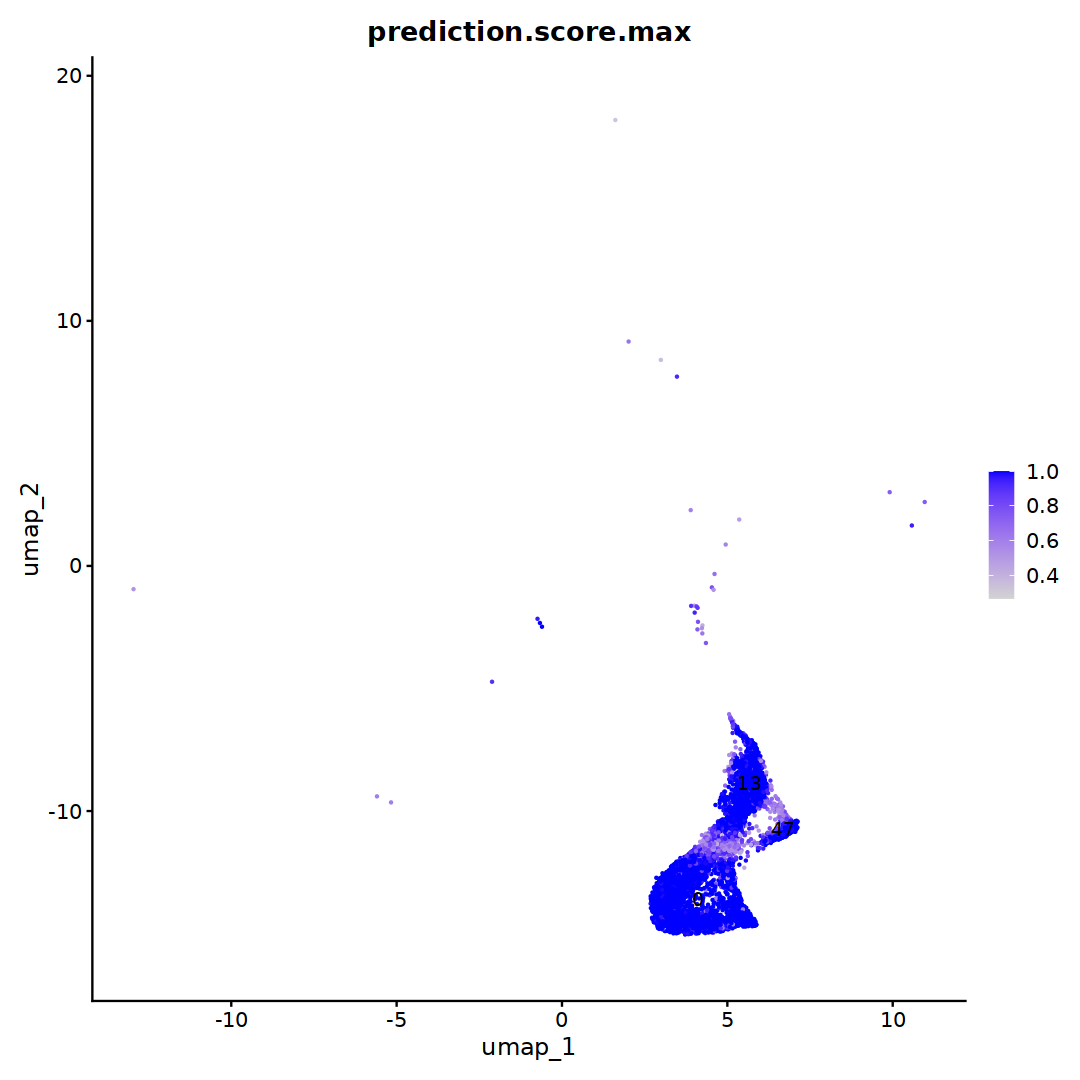

In [121]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_chunk == 'n1')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

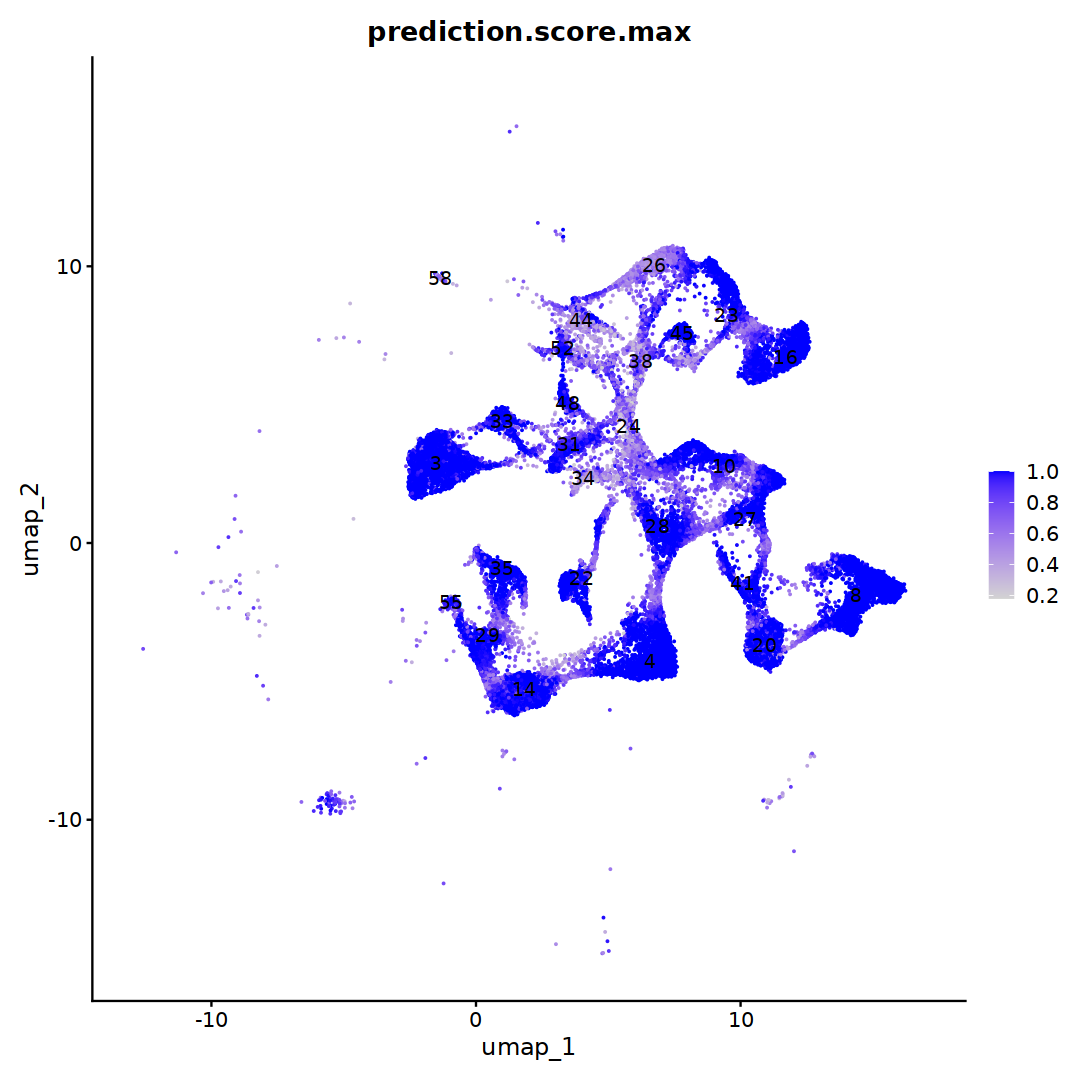

In [122]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_chunk == 'n0')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

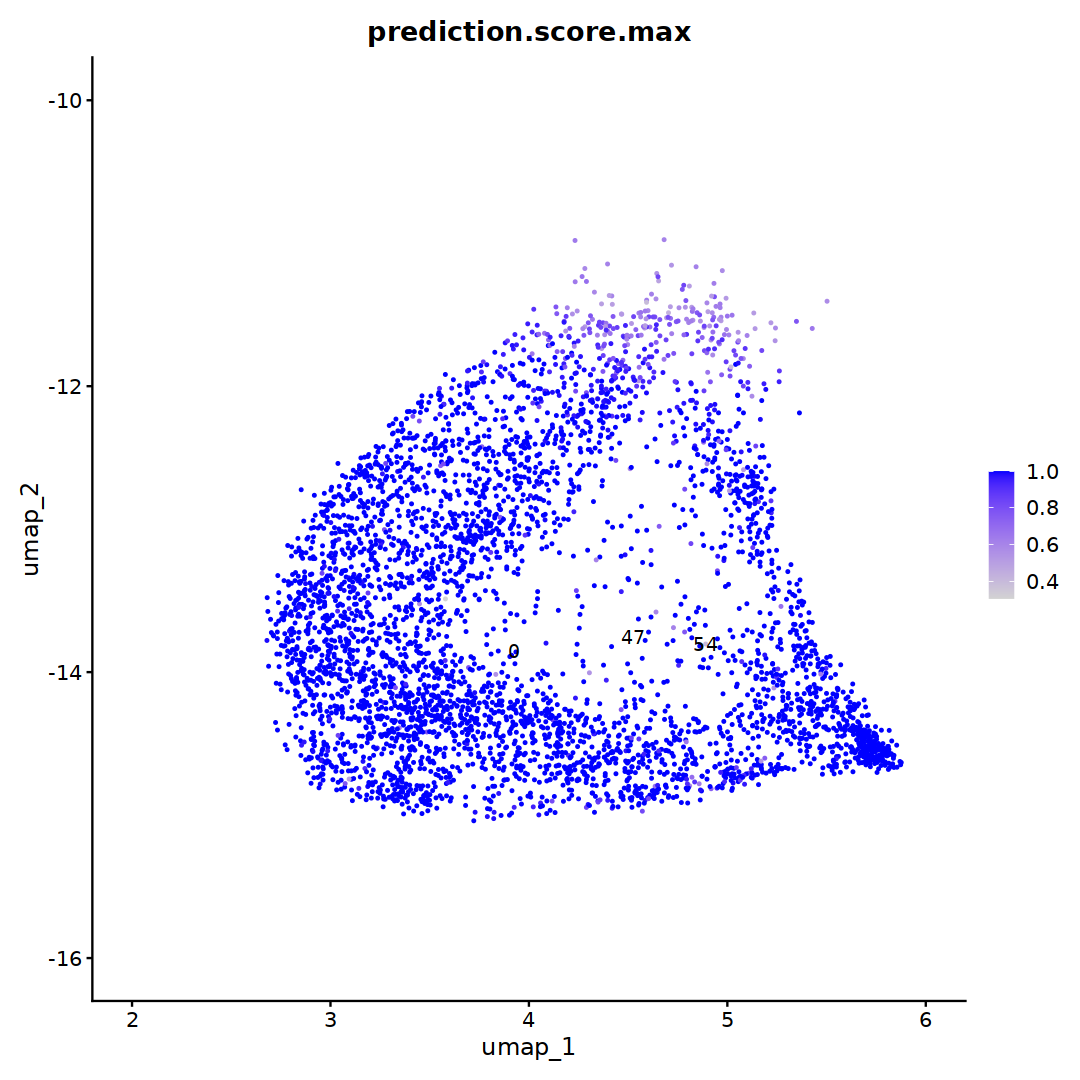

In [123]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_lvl1 == 'Agrp')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



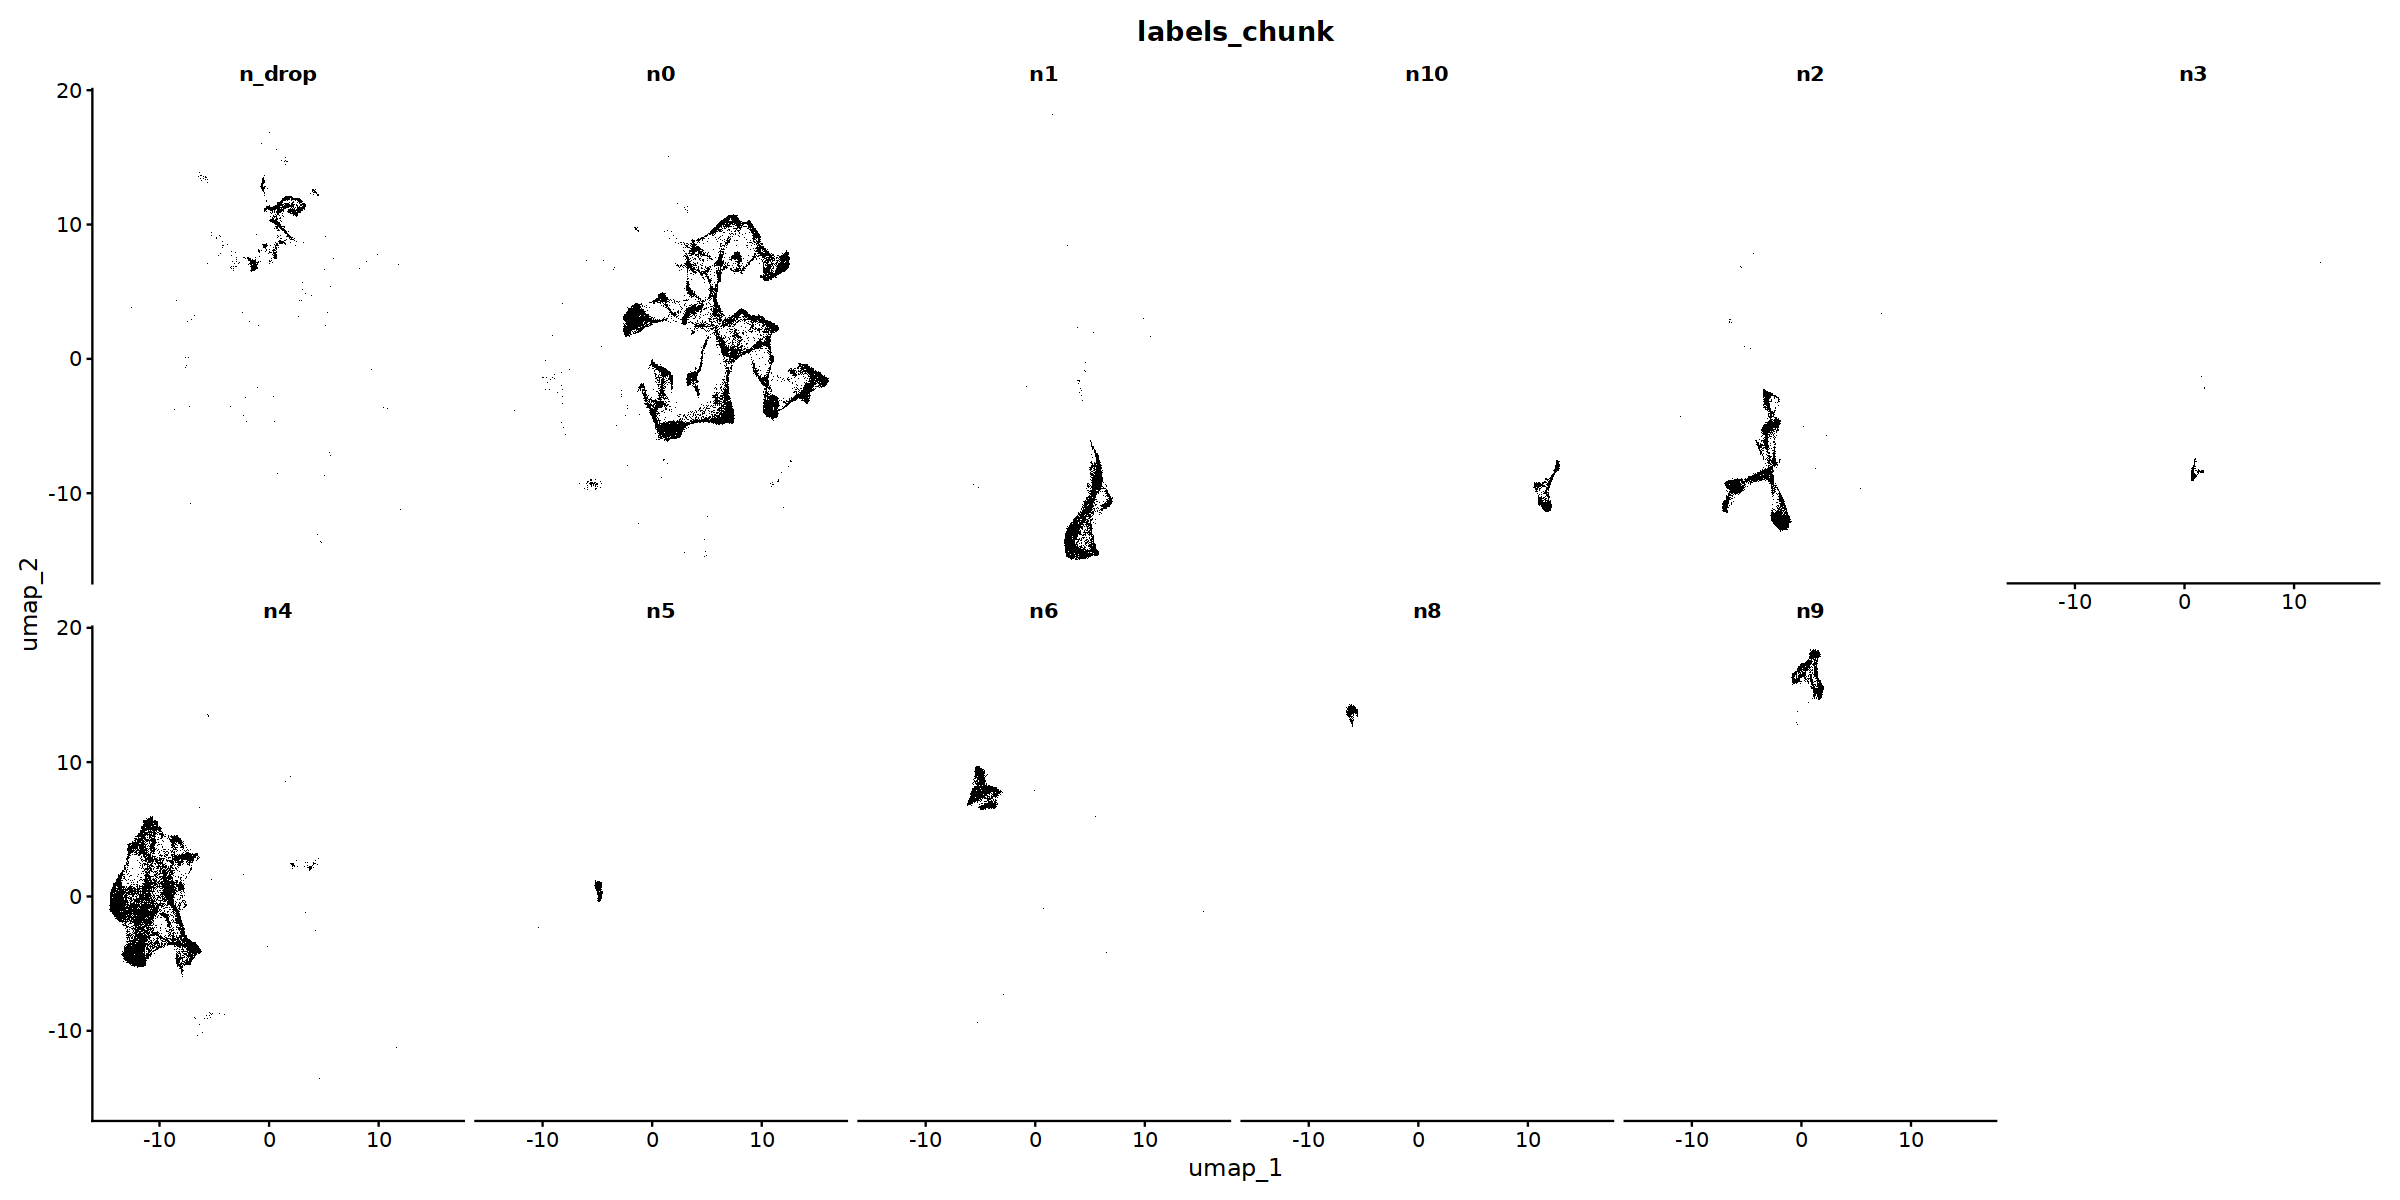

In [124]:
options(repr.plot.width=20, repr.plot.height=10)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_chunk', label=F, split.by='labels_chunk', ncol=6) + NoLegend()

Warning message:
“Could not find Npy in the default search locations, found in ‘RNA’ assay instead”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



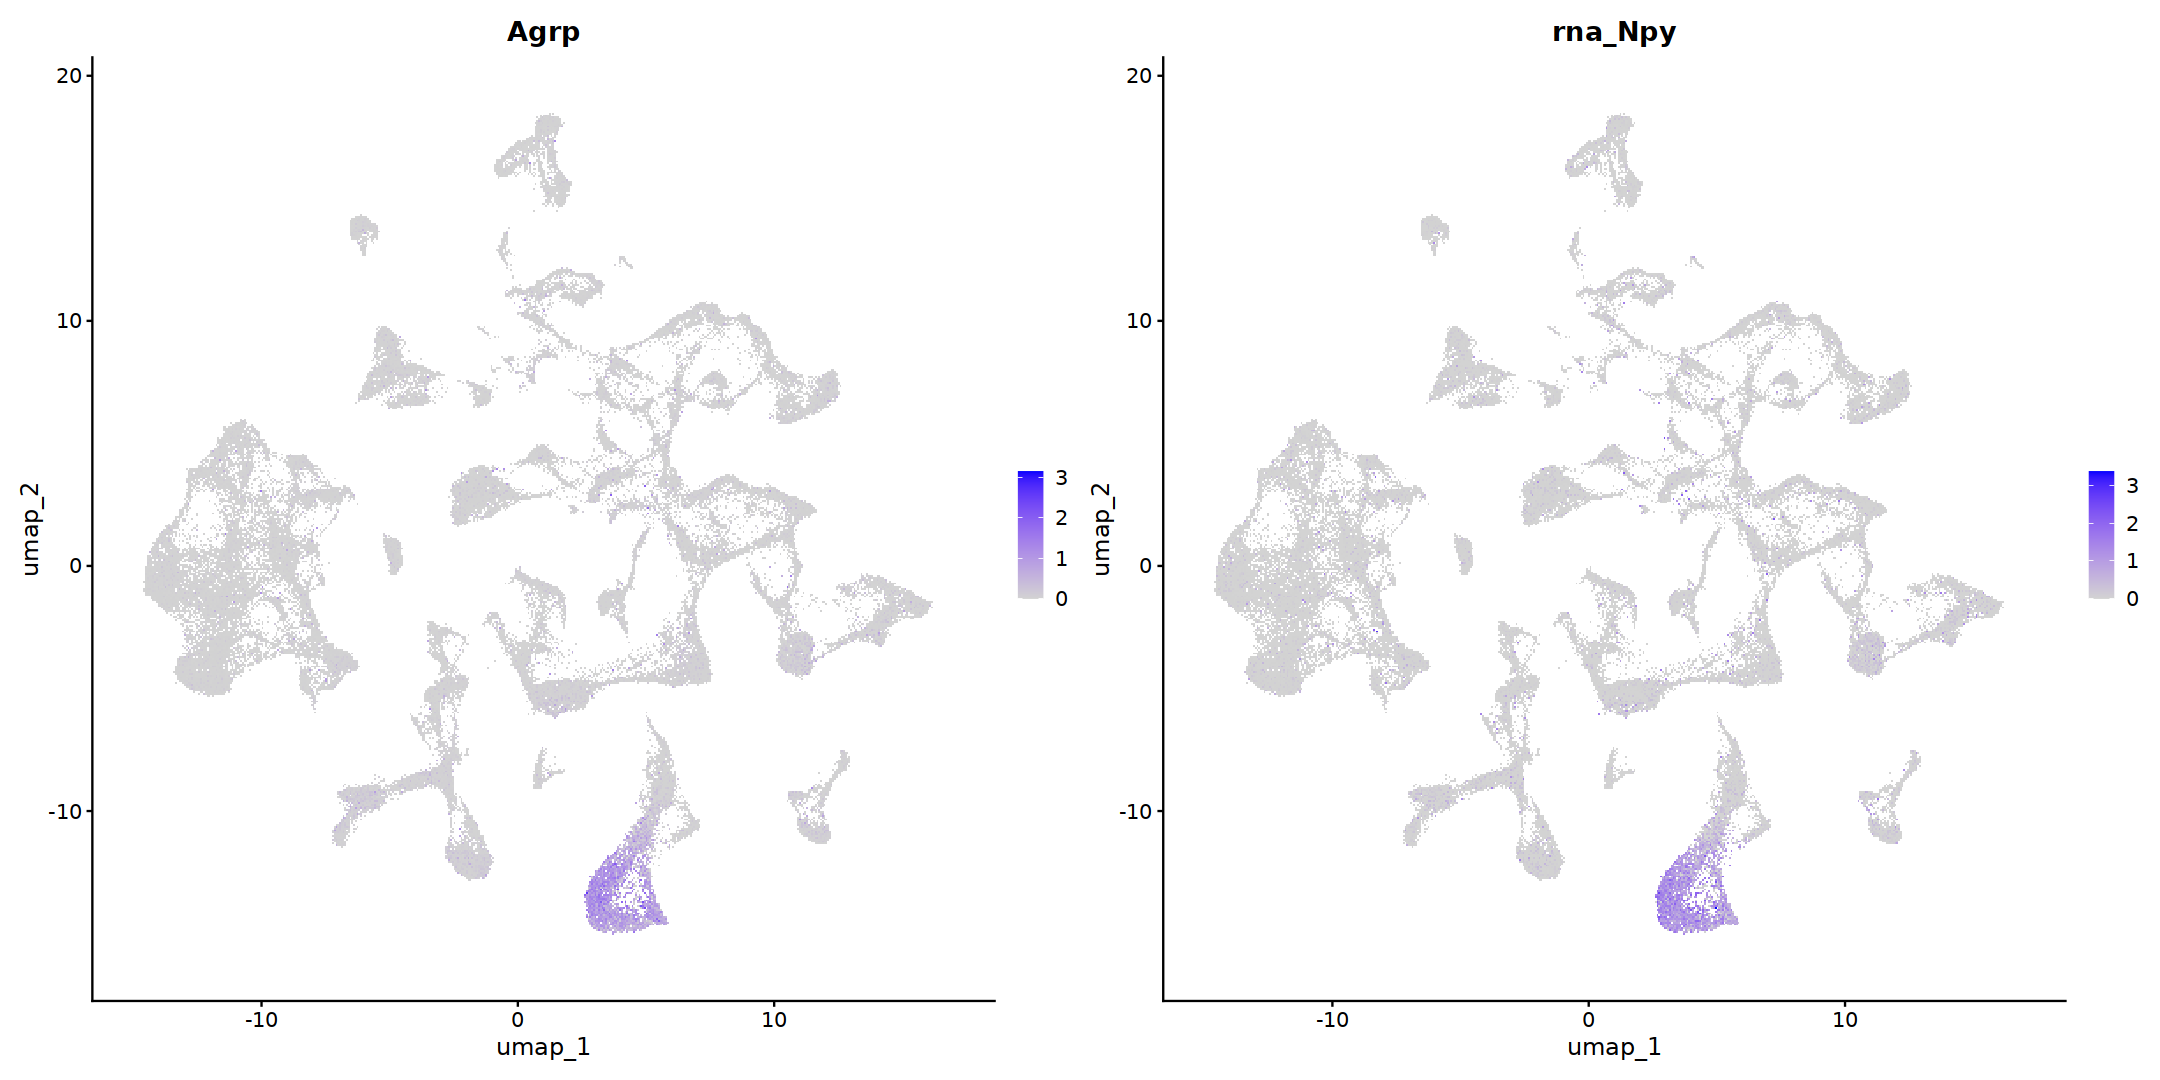

In [125]:
DefaultAssay(obj) = 'integrated'
options(repr.plot.width=18, repr.plot.height=9)
obj %>% FeaturePlot(features=c('Agrp', 'Npy'),slot = 'data',min.cutoff = 0, order =TRUE)

In [126]:
obj %>%
`[[` %>%
group_by(seurat_clusters) %>%
mutate(entropy = calculate_entropy(labels_lvl1)) %>%
select(seurat_clusters, entropy) %>%
distinct %>%
arrange(desc(entropy))

seurat_clusters entropy    
1  51              0.302941879
2  54              0.295197403
3  34              0.278105449
4  43              0.254013406
5  24              0.240055612
6  57              0.231455766
7  49              0.223827279
8  58              0.207919773
9  44              0.202460217
10 50              0.189077549
11 38              0.177138780
12 23              0.136198146
13 2               0.135984325
14 18              0.131315984
15 6               0.118193531
16 32              0.111524105
17 26              0.105407853
18 27              0.103734462
19 17              0.094195697
20 10              0.093725038
21 22              0.083903570
22 29              0.083369824
23 47              0.073686455
24 4               0.064444715
25 11              0.056926287
26 42              0.048736325
27 55              0.046786720
28 0               0.045505650
29 21              0.042236967
30 9               0.035907361
31 33              0.034370798
32 20              0.026771191
33 56              0.019830164
34 48              0.018900629
35 7               0.018312332
36 19              0.017659935
37 35              0.017428791
38 14              0.016482308
39 40              0.015846503
40 5               0.015373717
41 1               0.012946071
42 31              0.011720750
43 46              0.011201471
44 25              0.011082731
45 41              0.010740225
46 8               0.010225510
47 3               0.008082647
48 12              0.007839278
49 52              0.007093007
50 37              0.006714102
51 28              0.004242696
52 39              0.004129781
53 13              0.003412288
54 45              0.002952508
55 30              0.002198703
56 36              0.001058429
57 16              0.001010378
58 15              0.000000000
59 53              0.000000000

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



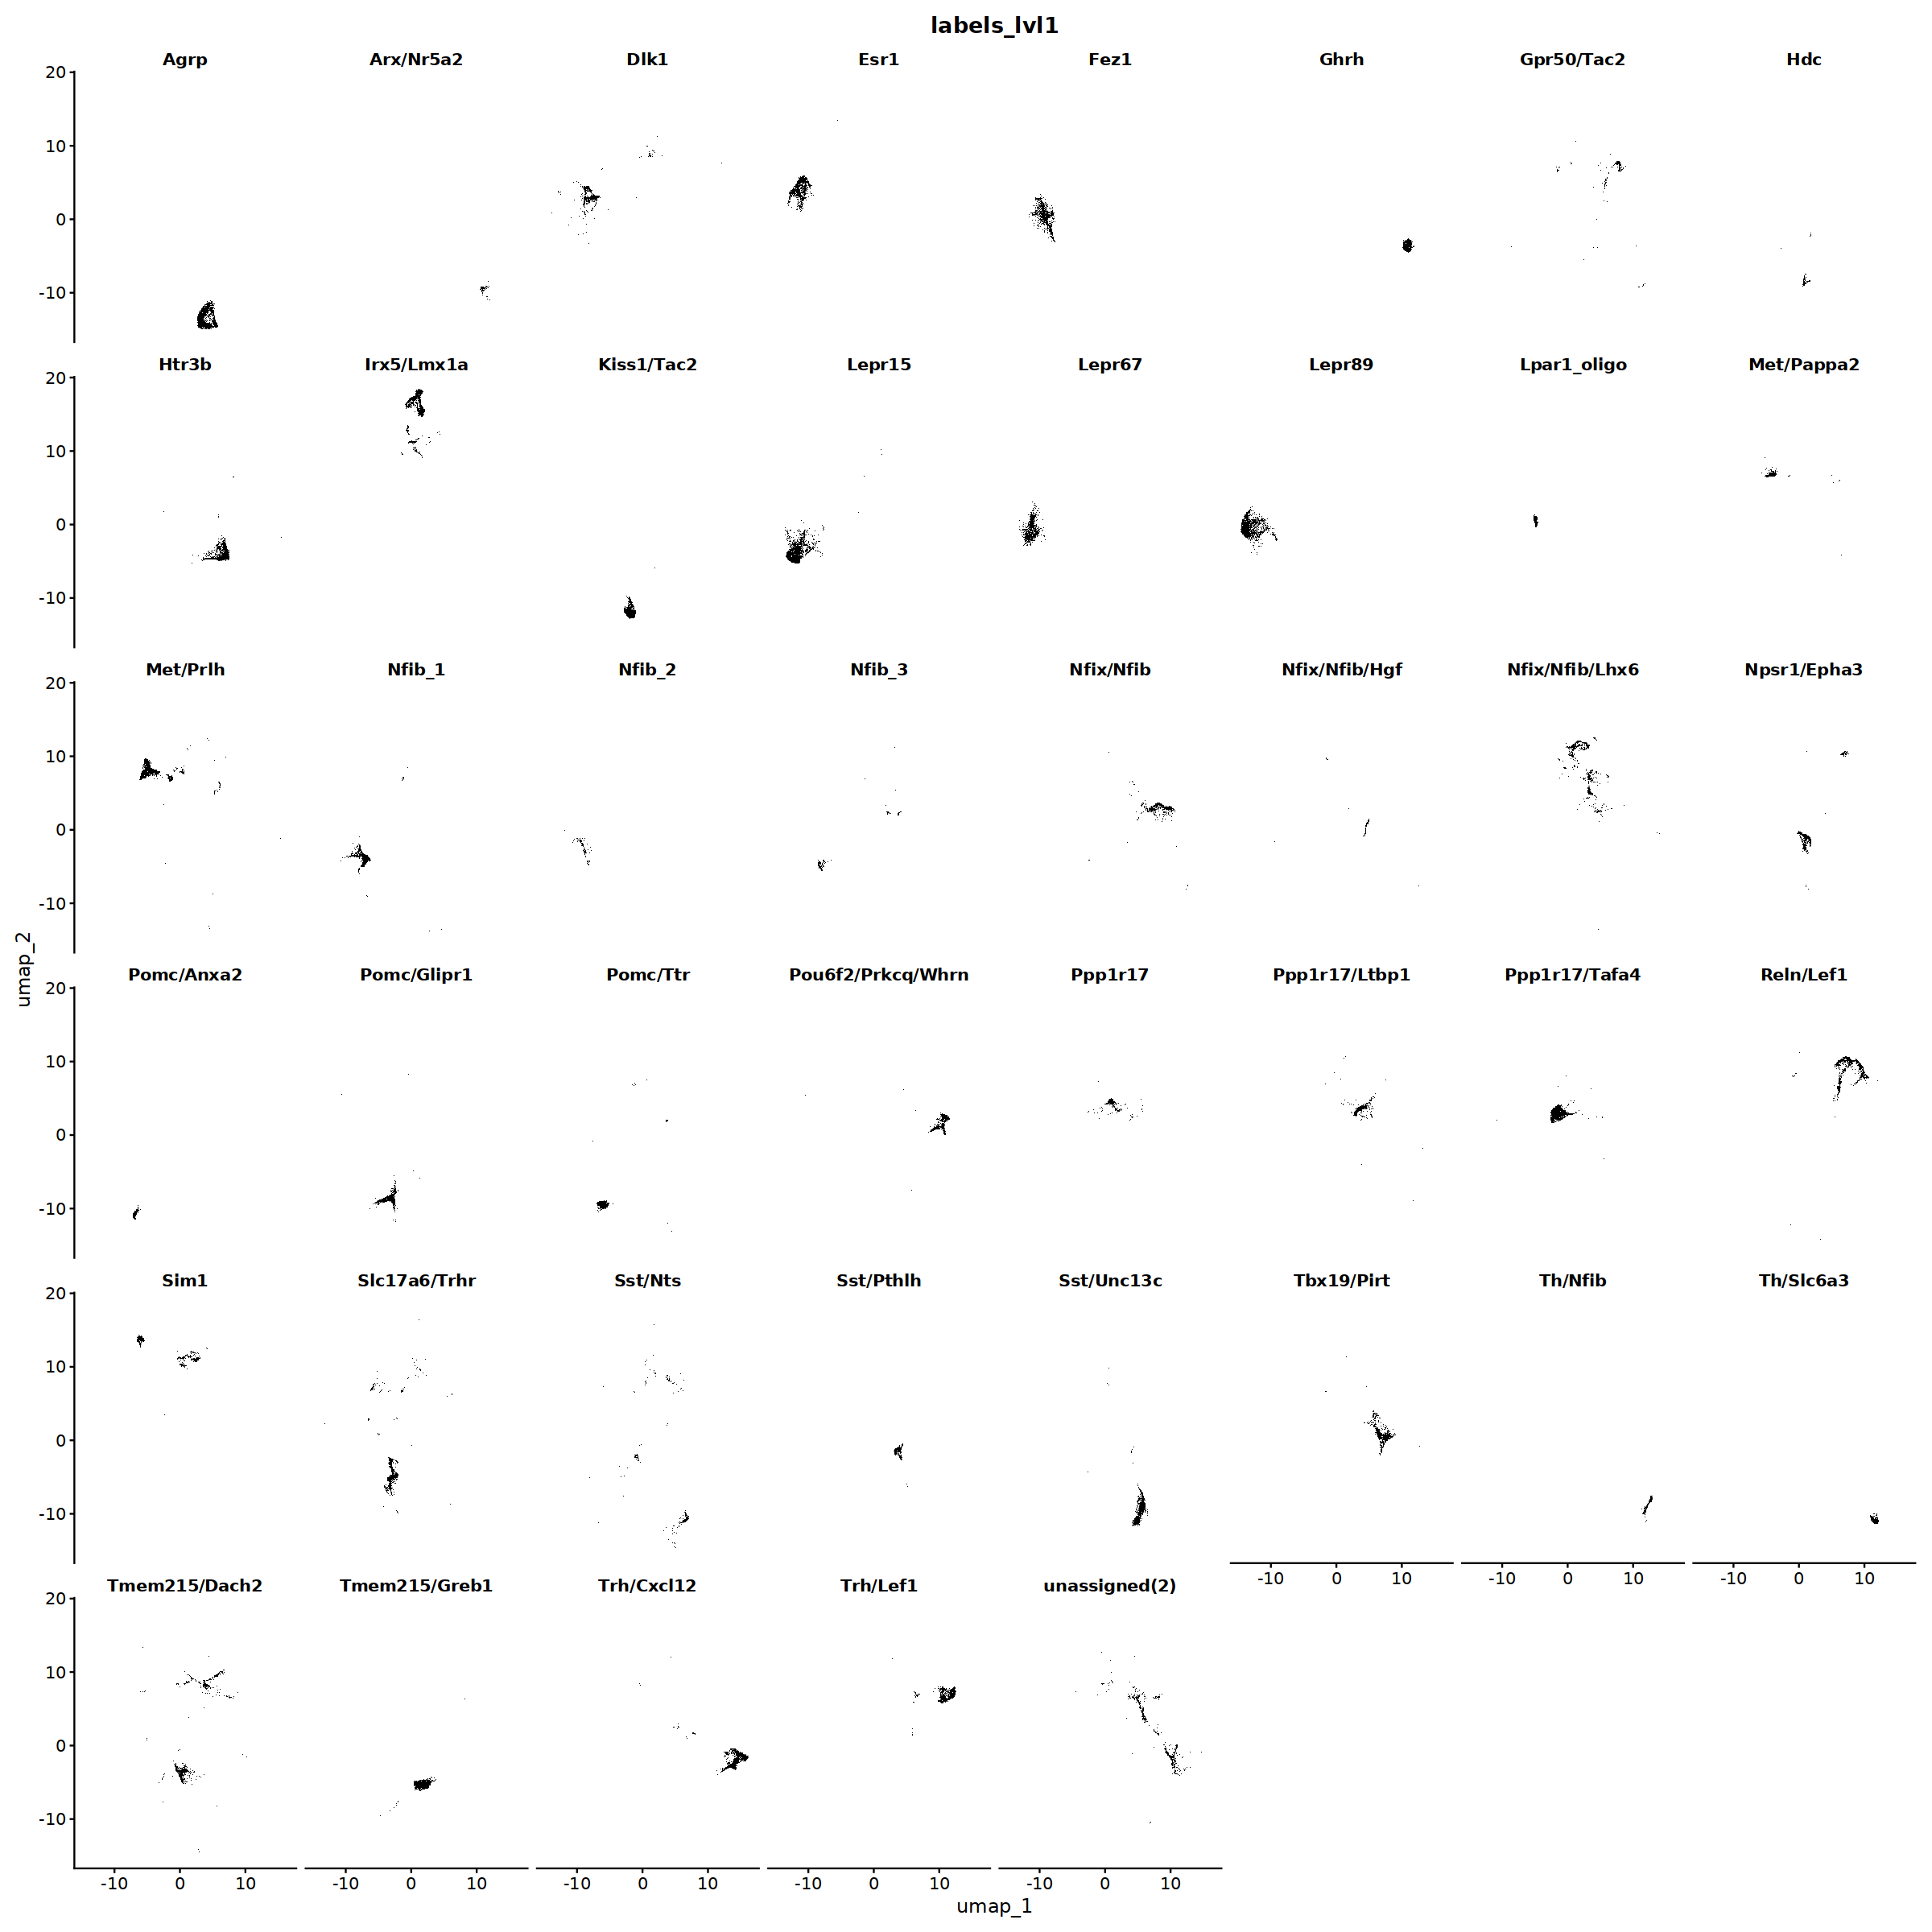

In [127]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=8) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



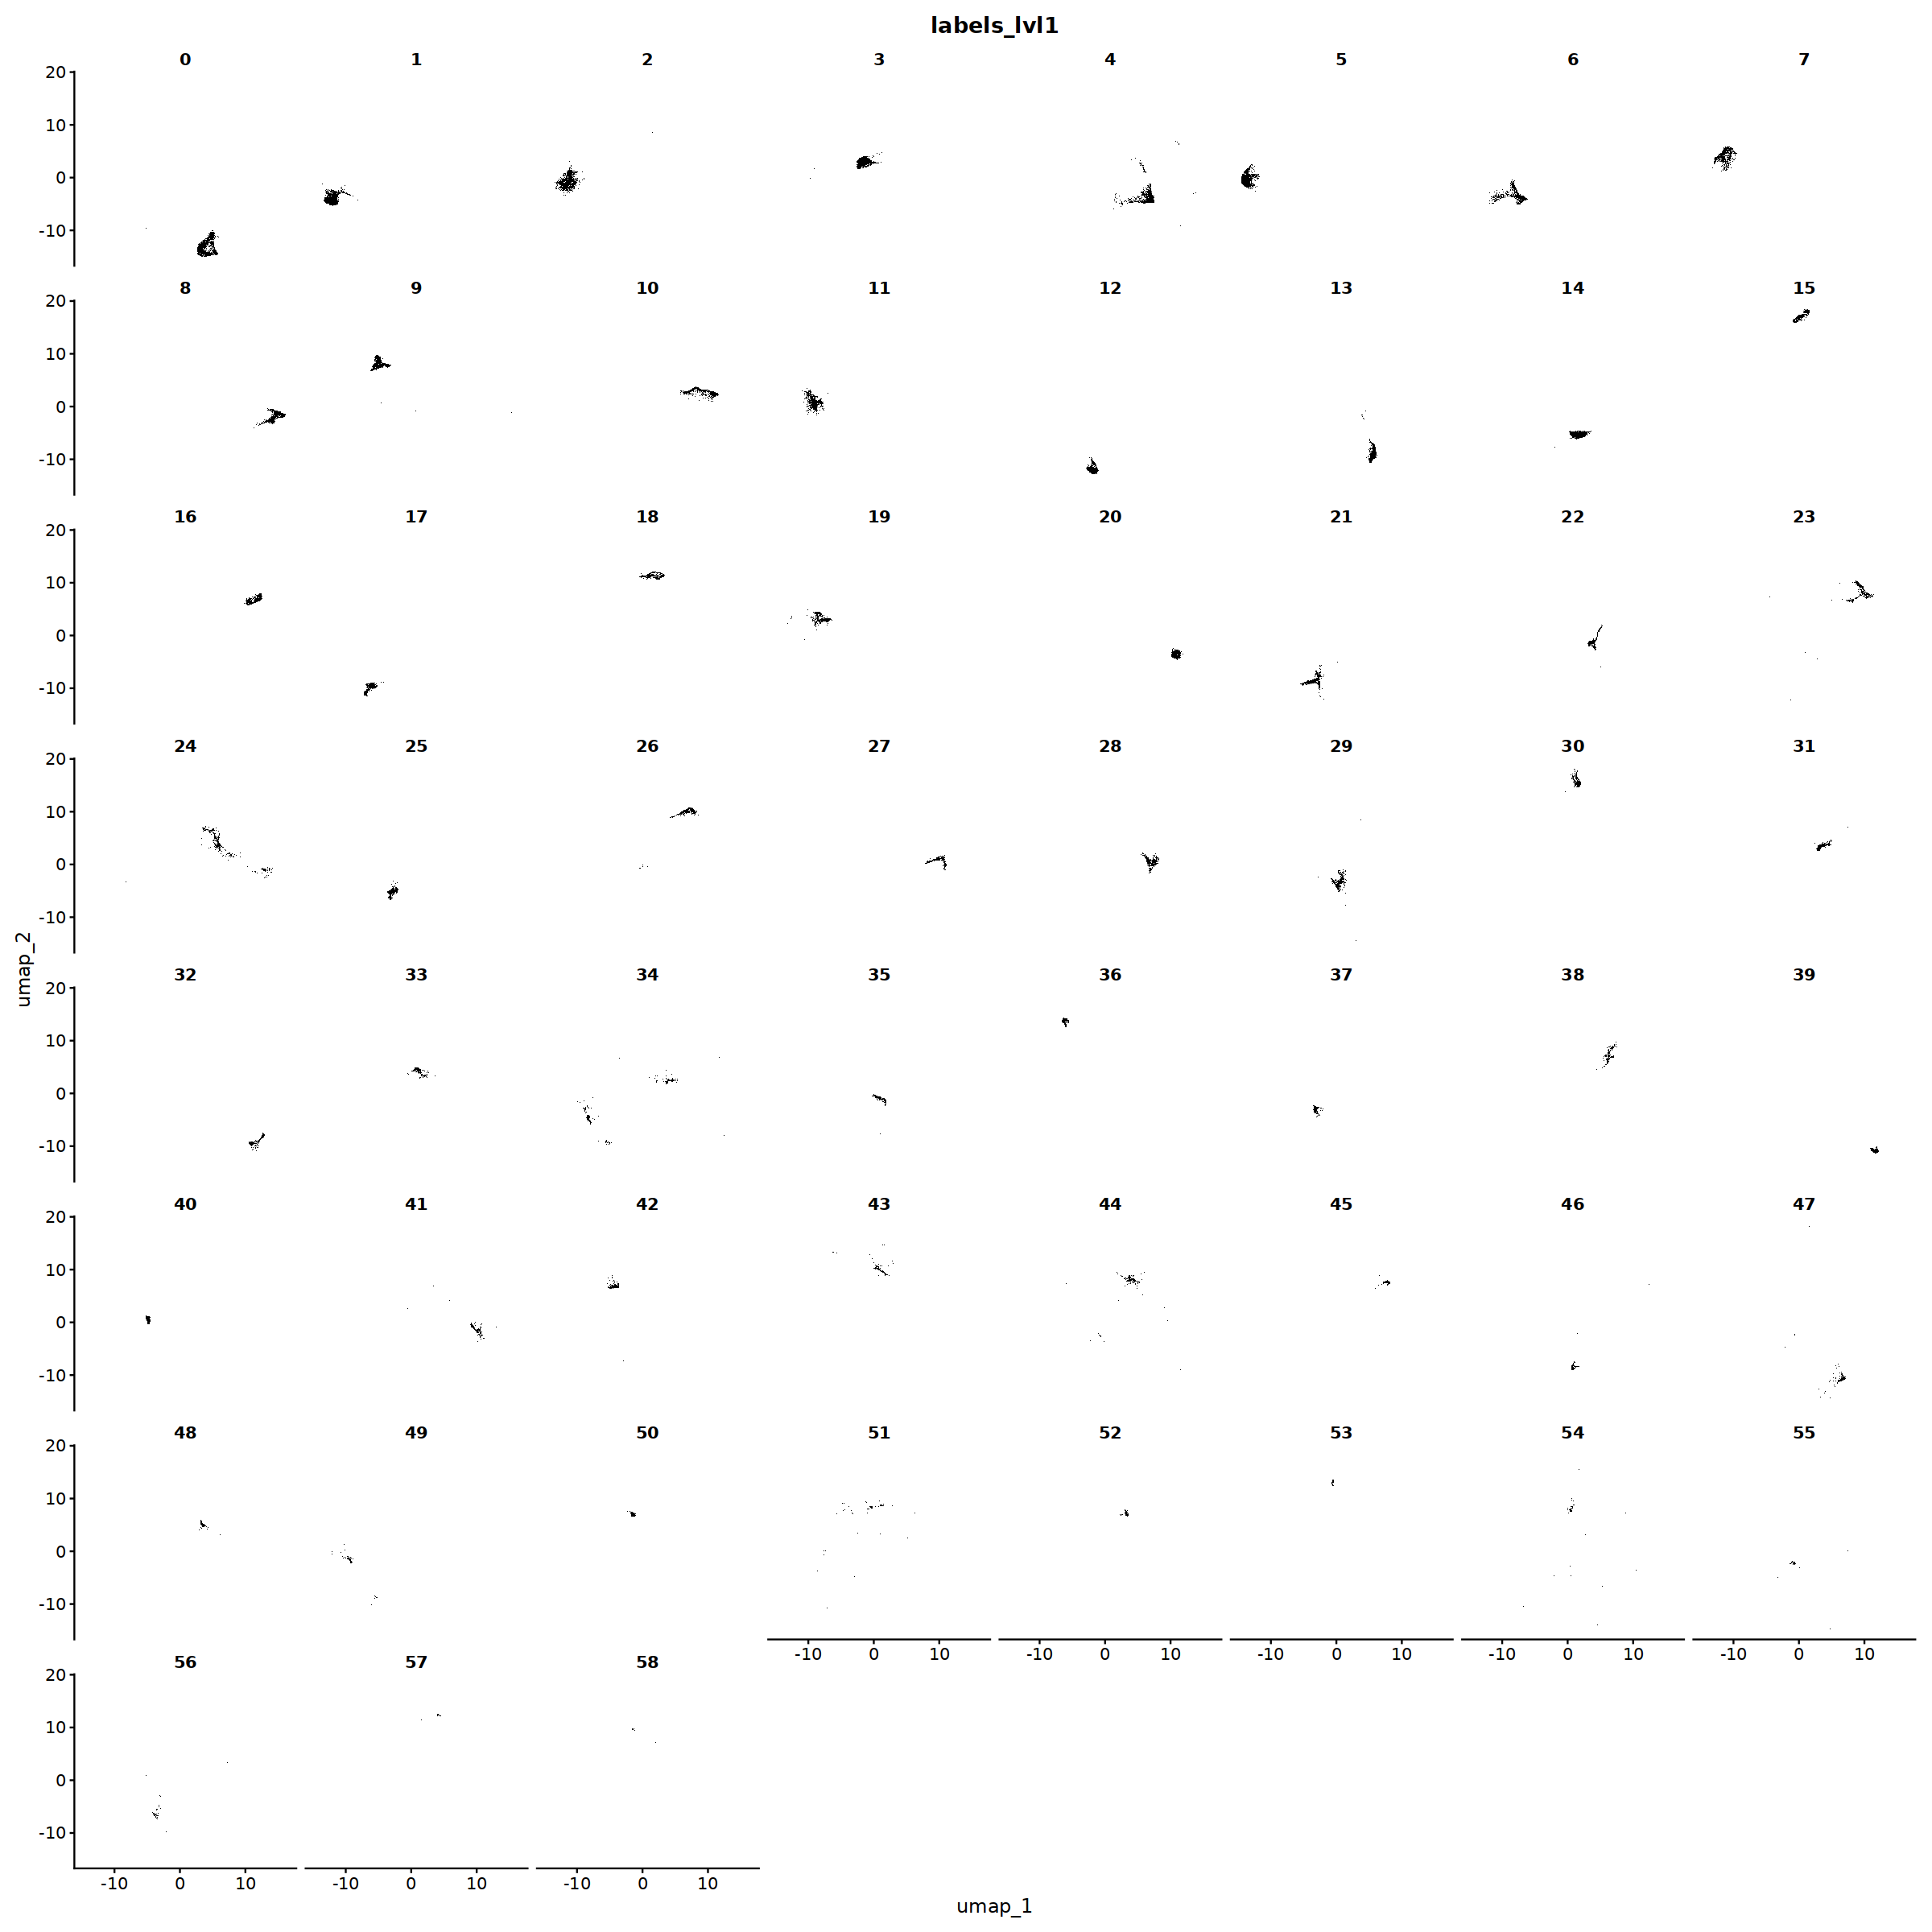

In [128]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

In [129]:
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')
freq_df %>% head

seurat_clusters Agrp      Arx/Nr5a2 Dlk1         Esr1        Fez1        
1 0               0.8831295 0         0.0000000000 0.000000000 0.0000000000
2 1               0.0000000 0         0.0000000000 0.000000000 0.0000000000
3 2               0.0000000 0         0.0026980623 0.006622517 0.0608290410
4 3               0.0000000 0         0.0004997501 0.000000000 0.0009995002
5 4               0.0000000 0         0.0000000000 0.000000000 0.0000000000
6 5               0.0000000 0         0.0000000000 0.007934337 0.0000000000
  Ghrh         Gpr50/Tac2   Hdc          Htr3b    ⋯ Sst/Pthlh Sst/Unc13c  
1 0.0001941371 0.0000000000 0.0000000000 0.000000 ⋯ 0         0.1108522617
2 0.0000000000 0.0000000000 0.0000000000 0.000000 ⋯ 0         0.0000000000
3 0.0000000000 0.0000000000 0.0000000000 0.000000 ⋯ 0         0.0000000000
4 0.0000000000 0.0002498751 0.0000000000 0.000000 ⋯ 0         0.0000000000
5 0.0000000000 0.0055776892 0.0002656042 0.899336 ⋯ 0         0.0002656042
6 0.0000000000 0.0000000000 0.0000000000 0.000000 ⋯ 0         0.0002735978
  Tbx19/Pirt Th/Nfib Th/Slc6a3 Tmem215/Dach2 Tmem215/Greb1 Trh/Cxcl12 
1 0.0000000  0       0         0.0000000000  0.00000000    0.000000000
2 0.0000000  0       0         0.0000000000  0.00000000    0.000000000
3 0.0000000  0       0         0.0004905568  0.00000000    0.000000000
4 0.0000000  0       0         0.0000000000  0.00000000    0.000000000
5 0.0252324  0       0         0.0132802125  0.02124834    0.007436919
6 0.0000000  0       0         0.0000000000  0.00000000    0.000000000
  Trh/Lef1    unassigned(2)
1 0.000000000 0.0000000000 
2 0.000000000 0.0000000000 
3 0.000000000 0.0000000000 
4 0.000000000 0.0000000000 
5 0.008499336 0.0005312085 
6 0.000000000 0.0000000000